In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
#X=np.array([[0,0],[0,1],[1,0],[1,1]])
#y=np.array([0,1,1,])
#Y=np.array([[1,0],[0,1],[0,1],[1,0]])
XORdata=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X=XORdata[:,0:2]
y=XORdata[:,-1]
print(X)
X=np.reshape(X,(4,2))
Y=np.ones((4,2),np.int8)
Y[0:4,0]=np.asarray(y)
Y[0,1]=1
Y[1,1]=0
Y[2,1]=0
Y[3,1]=1
print(Y)
def sigmoid(x):
   y=np.exp(-1*x)+1
   y=1/y
   #print(y)
   return y
def sigmoid_deriv(x):
    return x*(1-x)
def network():
     
     Layer1={'Layer':'Input','val':[]}
     Layer2={'Layer':'Hidden_one','val':[],'weight':np.ones((4,2),np.float64),'delta':np.zeros((4),np.float64)}
     Layer3={'Layer':'Output','val':[],'weight':np.ones((2,4),np.float64),'delta':np.zeros((2),np.float64)}
     Layer2['weight']=np.random.random(size=(3,2))*2-1
     Layer3['weight']=np.random.random(size=(2,3))*2-1
     net=[Layer1,Layer2,Layer3]
     return net




[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0 1]
 [1 0]
 [1 0]
 [0 1]]


In [11]:
net=network()
res=[]
error_log=np.zeros((100),np.float64)
epoc_val=np.zeros((100),np.float64)
#for epoc in range(1,10000):
 
 #for i in range (0,4):
  #  err=0
    
def for_prop(net,input):
    for j in range(len(net)):
         Layer=net[j]
         
         #print('FP',Layer['Layer'])
         if Layer['Layer']=='Input':
            Layer['val']=input
         else:
           Prev_Layer=net[j-1]
           weights=np.asarray(Layer['weight'])
           value=np.asarray(Prev_Layer['val'])
           val=[]
           for w in range(len(weights)):
             dval=0
             for k in range(len(value)):
               dval+=(weights[w,k]*value[k])
             dval=sigmoid(dval)
             val.append(dval)
           Layer['val']=val
           #Layer['delta']=sigmoid_deriv(np.asarray(val))
        
    return net,val
def back_prop(net,expected):
    for j in reversed(range(len(net))):
    
        Layer=net[j]
        if Layer['Layer']=='Input':
            break
    
        if Layer['Layer']=='Output':
           error=expected-np.asarray(Layer['val'])
           error=error
           err=error
        
           
           
        else :
           Next_Layer=net[j+1]
           weights=np.asarray(Next_Layer['weight'])
           weights=weights.T
           delta=np.asarray(Next_Layer['delta'])
           error=[]
           for w in range(len(weights)):
                de=0
                for k in range(len(delta)):
                    de+=weights[w,k]*delta[k]
                error.append(de)
        
        error=np.asarray(error)   
        deriv=sigmoid_deriv(np.asarray(Layer['val']))
    


        Layer['delta']=error*deriv
        
    return net,err
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['val'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weight'][j]+=lrate*neuron['delta']*inputs[j]
    return net
def weight_update(net,input):
    
    for j in range(len(net)):
        Layer=net[j]
        Prev_Layer=net[j-1]
        if Layer['Layer']=='Input':
            Layer['val']==input
        else:
            weights=np.asarray(Layer['weight'])
            value=np.asarray(Prev_Layer['val'])
            delta=np.asarray(Layer['delta'])
            #print(Layer['Layer'],'weight',weights,'delta',delta,'val',value)
            for w in range(len(weights)):#0-1
              for v in range(len(value)):#0-2
                weights[w,v]+=0.05*delta[w]*value[v]
             #weights[w,d]+=np.asarray(g)
                #print('weights[w]',weights[w])
            #print(Layer['Layer'],'weight',weights)
            Layer['weight']=weights
            
    return net
      



In [8]:
net=network()
_epock=np.zeros((12000),np.int64)
_error=np.zeros((12000,2),np.float64)

for epock in range(1,12000):
    err=0
    for i in range(len(X)):
        #print('X',X[i],'Y',Y[i])
        net,v=for_prop(net,X[i])
        net,e=back_prop(net,Y[i])
        net=weight_update(net,X[i])
        #net=updateWeights(net,X[i],.05)
        err=(Y[i]-v)**2 #for j in range(len(Y[i]))
        print(epock)
        print(e)
        _epock[epock-1]=epock
        _error[epock-1]=e
_epock[epock]=epock
_error[epock]=e
print(sigmoid_deriv(.93))

1
[-0.42564096  0.54758949]
1
[ 0.57682766 -0.42877073]
1
[ 0.59716959 -0.46347019]
1
[-0.40333068  0.56351712]
2
[-0.42644829  0.54704914]
2
[ 0.57587941 -0.42944091]
2
[ 0.59637861 -0.46403262]
2
[-0.40425999  0.56282171]
3
[-0.42724821  0.54651458]
3
[ 0.57494003 -0.43010404]
3
[ 0.59559495 -0.46458892]
3
[-0.40518059  0.5621337 ]
4
[-0.42804076  0.54598575]
4
[ 0.57400945 -0.43076019]
4
[ 0.59481857 -0.46513914]
4
[-0.40609254  0.56145303]
5
[-0.42882598  0.5454626 ]
5
[ 0.57308764 -0.43140942]
5
[ 0.59404941 -0.46568334]
5
[-0.40699588  0.56077963]
6
[-0.42960391  0.54494507]
6
[ 0.57217452 -0.4320518 ]
6
[ 0.59328744 -0.46622159]
6
[-0.40789069  0.56011343]
7
[-0.43037461  0.54443311]
7
[ 0.57127004 -0.43268738]
7
[ 0.59253259 -0.46675395]
7
[-0.40877701  0.55945435]
8
[-0.43113812  0.54392667]
8
[ 0.57037414 -0.43331625]
8
[ 0.59178483 -0.46728046]
8
[-0.4096549   0.55880232]
9
[-0.43189448  0.54342569]
9
[ 0.56948677 -0.43393845]
9
[ 0.5910441  -0.46780121]
9
[-0.41052444  0.55

81
[-0.47069682  0.51871172]
81
[ 0.52417415 -0.4648947 ]
81
[ 0.5530318  -0.49339735]
81
[-0.45496279  0.52613715]
82
[-0.47106006  0.51849041]
82
[ 0.52375229 -0.46517595]
82
[ 0.55267514 -0.49362603]
82
[-0.45537746  0.52584652]
83
[-0.47141953  0.51827162]
83
[ 0.52333485 -0.46545412]
83
[ 0.55232216 -0.49385211]
83
[-0.45578781  0.52555905]
84
[-0.47177527  0.51805532]
84
[ 0.52292181 -0.46572926]
84
[ 0.5519728  -0.49407561]
84
[-0.45619388  0.52527473]
85
[-0.47212731  0.51784148]
85
[ 0.5225131  -0.46600139]
85
[ 0.55162704 -0.49429656]
85
[-0.45659571  0.5249935 ]
86
[-0.4724757   0.51763008]
86
[ 0.5221087  -0.46627055]
86
[ 0.55128484 -0.494515  ]
86
[-0.45699335  0.52471534]
87
[-0.47282046  0.51742109]
87
[ 0.52170855 -0.46653677]
87
[ 0.55094616 -0.49473094]
87
[-0.45738683  0.52444021]
88
[-0.47316164  0.51721448]
88
[ 0.52131261 -0.46680008]
88
[ 0.55061097 -0.49494443]
88
[-0.45777621  0.52416808]
89
[-0.47349927  0.51701023]
89
[ 0.52092085 -0.46706051]
89
[ 0.5502792

[ 0.53537433 -0.50434004]
150
[-0.47539631  0.5119783 ]
151
[-0.48879204  0.50803041]
151
[ 0.50324364 -0.47870817]
151
[ 0.53520039 -0.50444276]
151
[-0.47559619  0.51184128]
152
[-0.48896568  0.50793249]
152
[ 0.50304395 -0.47883869]
152
[ 0.53502826 -0.50454428]
152
[-0.47579397  0.51170573]
153
[-0.48913749  0.50783573]
153
[ 0.50284639 -0.47896779]
153
[ 0.53485792 -0.50464461]
153
[-0.47598965  0.51157164]
154
[-0.48930749  0.50774011]
154
[ 0.50265095 -0.4790955 ]
154
[ 0.53468934 -0.50474377]
154
[-0.47618326  0.51143898]
155
[-0.48947569  0.50764562]
155
[ 0.50245761 -0.47922181]
155
[ 0.5345225  -0.50484176]
155
[-0.47637482  0.51130775]
156
[-0.48964212  0.50755225]
156
[ 0.50226634 -0.47934676]
156
[ 0.5343574  -0.50493861]
156
[-0.47656436  0.51117792]
157
[-0.48980679  0.50745999]
157
[ 0.50207712 -0.47947035]
157
[ 0.534194   -0.50503432]
157
[-0.4767519   0.51104948]
158
[-0.48996972  0.50736882]
158
[ 0.50188993 -0.4795926 ]
158
[ 0.5340323 -0.5051289]
158
[-0.47693745

[ 0.49132287 -0.4864966 ]
246
[ 0.52474417 -0.51022923]
246
[-0.48748851  0.50368988]
247
[-0.49930136  0.50245981]
247
[ 0.49125159 -0.48654363]
247
[ 0.52467956 -0.51026102]
247
[-0.48756064  0.50363985]
248
[-0.49936404  0.50243033]
248
[ 0.49118108 -0.48659017]
248
[ 0.52461561 -0.5102924 ]
248
[-0.48763201  0.50359032]
249
[-0.49942607  0.50240125]
249
[ 0.49111134 -0.48663622]
249
[ 0.5245523  -0.51032338]
249
[-0.48770262  0.50354128]
250
[-0.49948743  0.50237256]
250
[ 0.49104236 -0.48668179]
250
[ 0.52448963 -0.51035396]
250
[-0.4877725   0.50349274]
251
[-0.49954815  0.50234425]
251
[ 0.49097413 -0.48672688]
251
[ 0.52442759 -0.51038415]
251
[-0.48784163  0.50344468]
252
[-0.49960823  0.50231633]
252
[ 0.49090664 -0.4867715 ]
252
[ 0.52436618 -0.51041395]
252
[-0.48791004  0.50339711]
253
[-0.49966768  0.50228878]
253
[ 0.49083988 -0.48681566]
253
[ 0.52430538 -0.51044336]
253
[-0.48797773  0.50335   ]
254
[-0.4997265  0.5022616]
254
[ 0.49077385 -0.48685936]
254
[ 0.5242452 

337
[-0.49173036  0.50065455]
338
[-0.50298229  0.50096537]
338
[ 0.48717831 -0.4893069 ]
338
[ 0.52083672 -0.51190653]
338
[-0.49175805  0.5006334 ]
339
[-0.50300624  0.50095846]
339
[ 0.48715263 -0.48932541]
339
[ 0.52081064 -0.51191496]
339
[-0.49178546  0.50061242]
340
[-0.50302993  0.50095169]
340
[ 0.48712723 -0.48934374]
340
[ 0.5207848  -0.51192324]
340
[-0.49181258  0.50059163]
341
[-0.50305337  0.50094505]
341
[ 0.48710213 -0.4893619 ]
341
[ 0.52075921 -0.51193138]
341
[-0.49183943  0.50057102]
342
[-0.50307657  0.50093856]
342
[ 0.4870773  -0.48937988]
342
[ 0.52073386 -0.51193938]
342
[-0.49186599  0.50055058]
343
[-0.50309953  0.5009322 ]
343
[ 0.48705276 -0.48939769]
343
[ 0.52070875 -0.51194725]
343
[-0.49189228  0.50053032]
344
[-0.50312224  0.50092597]
344
[ 0.48702849 -0.48941533]
344
[ 0.52068388 -0.51195497]
344
[-0.4919183   0.50051023]
345
[-0.50314471  0.50091988]
345
[ 0.4870045 -0.4894328]
345
[ 0.52065923 -0.51196257]
345
[-0.49194404  0.50049031]
346
[-0.5031

441
[ 0.48562807 -0.490545  ]
441
[ 0.51908604 -0.51224769]
441
[-0.49350366  0.49914937]
442
[-0.50450389  0.50077855]
442
[ 0.48562056 -0.49055244]
442
[ 0.51907553 -0.5122475 ]
442
[-0.49351317  0.49913958]
443
[-0.50451191  0.50078027]
443
[ 0.48561314 -0.49055982]
443
[ 0.51906511 -0.51224726]
443
[-0.49352259  0.49912984]
444
[-0.50451986  0.50078204]
444
[ 0.48560583 -0.49056714]
444
[ 0.51905476 -0.51224699]
444
[-0.49353191  0.49912016]
445
[-0.50452772  0.50078385]
445
[ 0.4855986  -0.49057441]
445
[ 0.5190445  -0.51224667]
445
[-0.49354114  0.49911053]
446
[-0.5045355   0.50078571]
446
[ 0.48559147 -0.49058162]
446
[ 0.51903432 -0.51224631]
446
[-0.49355028  0.49910097]
447
[-0.50454319  0.5007876 ]
447
[ 0.48558443 -0.49058877]
447
[ 0.51902422 -0.51224591]
447
[-0.49355933  0.49909145]
448
[-0.50455081  0.50078954]
448
[ 0.48557748 -0.49059587]
448
[ 0.5190142  -0.51224547]
448
[-0.49356829  0.499082  ]
449
[-0.50455835  0.50079151]
449
[ 0.48557062 -0.49060292]
449
[ 0.51

[-0.49404459  0.49848794]
525
[-0.50495169  0.50103006]
525
[ 0.48525288 -0.49101396]
525
[ 0.51842769 -0.51212293]
525
[-0.49404881  0.49848137]
526
[-0.50495507  0.50103405]
526
[ 0.48525072 -0.49101811]
526
[ 0.51842191 -0.51212051]
526
[-0.49405299  0.49847482]
527
[-0.50495841  0.50103805]
527
[ 0.48524861 -0.49102224]
527
[ 0.51841617 -0.51211808]
527
[-0.49405714  0.4984683 ]
528
[-0.50496171  0.50104207]
528
[ 0.48524653 -0.49102635]
528
[ 0.51841046 -0.51211564]
528
[-0.49406124  0.4984618 ]
529
[-0.50496499  0.50104611]
529
[ 0.4852445  -0.49103043]
529
[ 0.51840478 -0.51211318]
529
[-0.4940653   0.49845533]
530
[-0.50496822  0.50105016]
530
[ 0.4852425  -0.49103449]
530
[ 0.51839914 -0.51211071]
530
[-0.49406933  0.49844887]
531
[-0.50497143  0.50105422]
531
[ 0.48524053 -0.49103853]
531
[ 0.51839354 -0.51210822]
531
[-0.49407332  0.49844245]
532
[-0.5049746  0.5010583]
532
[ 0.48523861 -0.49104254]
532
[ 0.51838797 -0.51210573]
532
[-0.49407727  0.49843604]
533
[-0.50497774

621
[-0.5051579   0.50146182]
621
[ 0.48517646 -0.49132818]
621
[ 0.51799395 -0.51184774]
621
[-0.49431773  0.49793452]
622
[-0.50515915  0.50146665]
622
[ 0.48517665 -0.49133079]
622
[ 0.51799037 -0.5118446 ]
622
[-0.49431952  0.49792946]
623
[-0.50516039  0.50147149]
623
[ 0.48517684 -0.49133338]
623
[ 0.51798681 -0.51184146]
623
[-0.49432129  0.49792441]
624
[-0.50516161  0.50147632]
624
[ 0.48517706 -0.49133596]
624
[ 0.51798326 -0.51183831]
624
[-0.49432305  0.49791937]
625
[-0.50516282  0.50148117]
625
[ 0.48517728 -0.49133854]
625
[ 0.51797973 -0.51183516]
625
[-0.4943248   0.49791434]
626
[-0.50516401  0.50148601]
626
[ 0.48517752 -0.4913411 ]
626
[ 0.51797621 -0.51183201]
626
[-0.49432653  0.49790931]
627
[-0.5051652   0.50149086]
627
[ 0.48517777 -0.49134365]
627
[ 0.5179727  -0.51182886]
627
[-0.49432825  0.4979043 ]
628
[-0.50516637  0.50149571]
628
[ 0.48517803 -0.4913462 ]
628
[ 0.51796921 -0.51182571]
628
[-0.49432996  0.49789929]
629
[-0.50516753  0.50150056]
629
[ 0.48

712
[-0.50523184  0.50191052]
712
[ 0.48523425 -0.49153194]
712
[ 0.51771258 -0.51155757]
712
[-0.49443617  0.49750416]
713
[-0.50523232  0.50191549]
713
[ 0.48523521 -0.49153388]
713
[ 0.51770987 -0.51155439]
713
[-0.49443711  0.4974997 ]
714
[-0.5052328   0.50192047]
714
[ 0.48523618 -0.49153582]
714
[ 0.51770716 -0.51155121]
714
[-0.49443804  0.49749524]
715
[-0.50523328  0.50192544]
715
[ 0.48523715 -0.49153775]
715
[ 0.51770446 -0.51154803]
715
[-0.49443896  0.49749078]
716
[-0.50523375  0.50193041]
716
[ 0.48523812 -0.49153968]
716
[ 0.51770176 -0.51154485]
716
[-0.49443988  0.49748633]
717
[-0.50523422  0.50193539]
717
[ 0.4852391 -0.4915416]
717
[ 0.51769907 -0.51154168]
717
[-0.49444079  0.49748189]
718
[-0.50523468  0.50194036]
718
[ 0.48524009 -0.49154352]
718
[ 0.51769639 -0.5115385 ]
718
[-0.4944417   0.49747745]
719
[-0.50523513  0.50194534]
719
[ 0.48524107 -0.49154543]
719
[ 0.51769371 -0.51153533]
719
[-0.4944426   0.49747301]
720
[-0.50523559  0.50195031]
720
[ 0.4852

804
[ 0.5174836  -0.51127189]
804
[-0.49450429  0.49710925]
805
[-0.50526082  0.50237039]
805
[ 0.48533787 -0.49169386]
805
[ 0.51748129 -0.51126888]
805
[-0.49450488  0.49710511]
806
[-0.505261    0.50237528]
806
[ 0.48533909 -0.49169543]
806
[ 0.51747899 -0.51126587]
806
[-0.49450547  0.49710097]
807
[-0.50526118  0.50238017]
807
[ 0.48534031 -0.49169699]
807
[ 0.51747669 -0.51126287]
807
[-0.49450606  0.49709683]
808
[-0.50526135  0.50238506]
808
[ 0.48534153 -0.49169855]
808
[ 0.51747439 -0.51125987]
808
[-0.49450665  0.49709269]
809
[-0.50526153  0.50238995]
809
[ 0.48534275 -0.49170011]
809
[ 0.5174721  -0.51125687]
809
[-0.49450723  0.49708856]
810
[-0.5052617   0.50239483]
810
[ 0.48534397 -0.49170166]
810
[ 0.51746981 -0.51125387]
810
[-0.49450782  0.49708443]
811
[-0.50526187  0.50239972]
811
[ 0.48534519 -0.49170321]
811
[ 0.51746752 -0.51125088]
811
[-0.4945084  0.4970803]
812
[-0.50526204  0.5024046 ]
812
[ 0.48534642 -0.49170476]
812
[ 0.51746524 -0.51124788]
812
[-0.4945

875
[-0.49454184  0.49682116]
876
[-0.50526965  0.50271364]
876
[ 0.48542654 -0.49179765]
876
[ 0.51732466 -0.5110617 ]
876
[-0.49454232  0.49681719]
877
[-0.50526973  0.50271841]
877
[ 0.48542781 -0.49179901]
877
[ 0.51732254 -0.51105888]
877
[-0.49454279  0.49681321]
878
[-0.5052698   0.50272318]
878
[ 0.48542907 -0.49180037]
878
[ 0.51732042 -0.51105605]
878
[-0.49454327  0.49680924]
879
[-0.50526988  0.50272795]
879
[ 0.48543034 -0.49180173]
879
[ 0.51731831 -0.51105324]
879
[-0.49454374  0.49680527]
880
[-0.50526995  0.50273271]
880
[ 0.48543161 -0.49180308]
880
[ 0.51731619 -0.51105042]
880
[-0.49454421  0.49680131]
881
[-0.50527003  0.50273747]
881
[ 0.48543288 -0.49180443]
881
[ 0.51731408 -0.51104761]
881
[-0.49454468  0.49679734]
882
[-0.5052701   0.50274224]
882
[ 0.48543415 -0.49180578]
882
[ 0.51731197 -0.5110448 ]
882
[-0.49454515  0.49679338]
883
[-0.50527017  0.50274699]
883
[ 0.48543542 -0.49180713]
883
[ 0.51730987 -0.51104199]
883
[-0.49454562  0.49678942]
884
[-0.50

[ 0.48553437 -0.49190487]
961
[ 0.51715124 -0.51083139]
961
[-0.49457939  0.49648675]
962
[-0.50527347  0.50311664]
962
[ 0.48553564 -0.49190603]
962
[ 0.51714927 -0.5108288 ]
962
[-0.49457979  0.49648294]
963
[-0.50527348  0.50312123]
963
[ 0.4855369  -0.49190719]
963
[ 0.51714731 -0.51082621]
963
[-0.4945802   0.49647914]
964
[-0.5052735   0.50312583]
964
[ 0.48553816 -0.49190835]
964
[ 0.51714534 -0.51082362]
964
[-0.4945806   0.49647534]
965
[-0.50527352  0.50313042]
965
[ 0.48553942 -0.49190951]
965
[ 0.51714338 -0.51082104]
965
[-0.49458101  0.49647154]
966
[-0.50527353  0.50313501]
966
[ 0.48554068 -0.49191066]
966
[ 0.51714142 -0.51081846]
966
[-0.49458141  0.49646774]
967
[-0.50527355  0.5031396 ]
967
[ 0.48554194 -0.49191182]
967
[ 0.51713946 -0.51081588]
967
[-0.49458181  0.49646395]
968
[-0.50527356  0.50314419]
968
[ 0.4855432  -0.49191297]
968
[ 0.5171375 -0.5108133]
968
[-0.49458221  0.49646015]
969
[-0.50527358  0.50314877]
969
[ 0.48554446 -0.49191412]
969
[ 0.51713554

1057
[-0.50527343  0.5035439 ]
1057
[ 0.4856536  -0.49200717]
1057
[ 0.51696881 -0.51059496]
1057
[-0.49461622  0.49612968]
1058
[-0.50527342  0.50354829]
1058
[ 0.48565482 -0.49200814]
1058
[ 0.51696697 -0.51059263]
1058
[-0.49461659  0.49612604]
1059
[-0.50527341  0.50355269]
1059
[ 0.48565604 -0.49200911]
1059
[ 0.51696513 -0.5105903 ]
1059
[-0.49461695  0.49612241]
1060
[-0.50527339  0.50355708]
1060
[ 0.48565726 -0.49201007]
1060
[ 0.5169633  -0.51058797]
1060
[-0.49461732  0.49611878]
1061
[-0.50527337  0.50356147]
1061
[ 0.48565847 -0.49201104]
1061
[ 0.51696147 -0.51058565]
1061
[-0.49461768  0.49611515]
1062
[-0.50527336  0.50356585]
1062
[ 0.48565969 -0.492012  ]
1062
[ 0.51695963 -0.51058332]
1062
[-0.49461805  0.49611152]
1063
[-0.50527334  0.50357024]
1063
[ 0.48566091 -0.49201296]
1063
[ 0.5169578 -0.510581 ]
1063
[-0.49461841  0.49610789]
1064
[-0.50527333  0.50357462]
1064
[ 0.48566212 -0.49201392]
1064
[ 0.51695597 -0.51057869]
1064
[-0.49461878  0.49610427]
1065
[-0.5

1123
[ 0.48573285 -0.49206718]
1123
[ 0.51685011 -0.51044663]
1123
[-0.49463983  0.4958934 ]
1124
[-0.50527198  0.50383363]
1124
[ 0.48573403 -0.49206802]
1124
[ 0.51684835 -0.51044447]
1124
[-0.49464018  0.49588987]
1125
[-0.50527195  0.50383788]
1125
[ 0.48573521 -0.49206887]
1125
[ 0.51684659 -0.51044231]
1125
[-0.49464053  0.49588635]
1126
[-0.50527192  0.50384213]
1126
[ 0.48573639 -0.49206971]
1126
[ 0.51684483 -0.51044016]
1126
[-0.49464088  0.49588283]
1127
[-0.5052719   0.50384638]
1127
[ 0.48573757 -0.49207056]
1127
[ 0.51684307 -0.510438  ]
1127
[-0.49464123  0.49587931]
1128
[-0.50527187  0.50385063]
1128
[ 0.48573875 -0.4920714 ]
1128
[ 0.51684132 -0.51043585]
1128
[-0.49464158  0.49587579]
1129
[-0.50527184  0.50385487]
1129
[ 0.48573993 -0.49207224]
1129
[ 0.51683956 -0.51043371]
1129
[-0.49464192  0.49587228]
1130
[-0.50527181  0.50385911]
1130
[ 0.4857411  -0.49207307]
1130
[ 0.51683781 -0.51043156]
1130
[-0.49464227  0.49586876]
1131
[-0.50527178  0.50386335]
1131
[ 0

[-0.49466957  0.49559293]
1211
[-0.505269    0.50419559]
1211
[ 0.48583457 -0.49213514]
1211
[ 0.51669929 -0.5102661 ]
1211
[-0.49466991  0.49558955]
1212
[-0.50526896  0.50419965]
1212
[ 0.4858357  -0.49213583]
1212
[ 0.51669762 -0.51026416]
1212
[-0.49467024  0.49558617]
1213
[-0.50526892  0.50420372]
1213
[ 0.48583683 -0.49213653]
1213
[ 0.51669596 -0.51026222]
1213
[-0.49467058  0.49558279]
1214
[-0.50526888  0.50420778]
1214
[ 0.48583795 -0.49213722]
1214
[ 0.51669429 -0.51026028]
1214
[-0.49467091  0.49557942]
1215
[-0.50526884  0.50421184]
1215
[ 0.48583908 -0.49213791]
1215
[ 0.51669262 -0.51025835]
1215
[-0.49467124  0.49557604]
1216
[-0.5052688  0.5042159]
1216
[ 0.48584021 -0.4921386 ]
1216
[ 0.51669096 -0.51025642]
1216
[-0.49467158  0.49557267]
1217
[-0.50526875  0.50421996]
1217
[ 0.48584134 -0.49213929]
1217
[ 0.5166893  -0.51025449]
1217
[-0.49467191  0.49556929]
1218
[-0.50526871  0.50422401]
1218
[ 0.48584246 -0.49213998]
1218
[ 0.51668764 -0.51025256]
1218
[-0.494672

1320
[ 0.48595422 -0.49220157]
1320
[ 0.51652319 -0.51006837]
1320
[-0.49470552  0.4952304 ]
1321
[-0.50526397  0.50463052]
1321
[ 0.48595528 -0.49220209]
1321
[ 0.51652163 -0.51006669]
1321
[-0.49470584  0.4952272 ]
1322
[-0.50526392  0.50463436]
1322
[ 0.48595635 -0.49220261]
1322
[ 0.51652006 -0.510065  ]
1322
[-0.49470616  0.49522399]
1323
[-0.50526387  0.5046382 ]
1323
[ 0.48595741 -0.49220313]
1323
[ 0.5165185  -0.51006332]
1323
[-0.49470648  0.49522078]
1324
[-0.50526381  0.50464204]
1324
[ 0.48595848 -0.49220365]
1324
[ 0.51651694 -0.51006164]
1324
[-0.4947068   0.49521758]
1325
[-0.50526376  0.50464587]
1325
[ 0.48595954 -0.49220416]
1325
[ 0.51651538 -0.51005996]
1325
[-0.49470712  0.49521438]
1326
[-0.50526371  0.5046497 ]
1326
[ 0.4859606  -0.49220468]
1326
[ 0.51651382 -0.51005828]
1326
[-0.49470744  0.49521118]
1327
[-0.50526366  0.50465353]
1327
[ 0.48596166 -0.49220519]
1327
[ 0.51651226 -0.51005661]
1327
[-0.49470775  0.49520798]
1328
[-0.50526361  0.50465736]
1328
[ 0

1398
[-0.5052598   0.50492025]
1398
[ 0.48603562 -0.49223784]
1398
[ 0.51640387 -0.50994345]
1398
[-0.49473009  0.49498476]
1399
[-0.50525974  0.50492393]
1399
[ 0.48603664 -0.49223825]
1399
[ 0.51640238 -0.50994193]
1399
[-0.4947304   0.49498167]
1400
[-0.50525968  0.50492762]
1400
[ 0.48603766 -0.49223865]
1400
[ 0.51640088 -0.50994042]
1400
[-0.49473071  0.49497858]
1401
[-0.50525963  0.5049313 ]
1401
[ 0.48603868 -0.49223906]
1401
[ 0.51639939 -0.50993891]
1401
[-0.49473102  0.4949755 ]
1402
[-0.50525957  0.50493497]
1402
[ 0.4860397  -0.49223946]
1402
[ 0.5163979 -0.5099374]
1402
[-0.49473133  0.49497241]
1403
[-0.50525951  0.50493865]
1403
[ 0.48604072 -0.49223986]
1403
[ 0.51639641 -0.50993589]
1403
[-0.49473164  0.49496933]
1404
[-0.50525945  0.50494233]
1404
[ 0.48604174 -0.49224026]
1404
[ 0.51639491 -0.50993439]
1404
[-0.49473195  0.49496625]
1405
[-0.5052594  0.504946 ]
1405
[ 0.48604276 -0.49224066]
1405
[ 0.51639342 -0.50993289]
1405
[-0.49473226  0.49496317]
1406
[-0.505

[ 0.48614564 -0.49227435]
1509
[ 0.51624301 -0.50978801]
1509
[-0.49476389  0.49465102]
1510
[-0.50525296  0.50532067]
1510
[ 0.4861466 -0.4922746]
1510
[ 0.5162416  -0.50978673]
1510
[-0.49476419  0.4946481 ]
1511
[-0.50525289  0.50532414]
1511
[ 0.48614756 -0.49227485]
1511
[ 0.5162402  -0.50978544]
1511
[-0.49476448  0.49464517]
1512
[-0.50525283  0.5053276 ]
1512
[ 0.48614852 -0.4922751 ]
1512
[ 0.5162388  -0.50978416]
1512
[-0.49476478  0.49464225]
1513
[-0.50525276  0.50533106]
1513
[ 0.48614948 -0.49227535]
1513
[ 0.5162374  -0.50978288]
1513
[-0.49476508  0.49463933]
1514
[-0.5052527   0.50533452]
1514
[ 0.48615044 -0.49227559]
1514
[ 0.516236  -0.5097816]
1514
[-0.49476538  0.49463642]
1515
[-0.50525263  0.50533798]
1515
[ 0.4861514  -0.49227584]
1515
[ 0.5162346  -0.50978033]
1515
[-0.49476568  0.4946335 ]
1516
[-0.50525257  0.50534143]
1516
[ 0.48615236 -0.49227608]
1516
[ 0.5162332  -0.50977905]
1516
[-0.49476597  0.49463058]
1517
[-0.5052525   0.50534489]
1517
[ 0.48615331

[-0.50524794  0.50557531]
1585
[ 0.48621718 -0.49228969]
1585
[ 0.51613855 -0.50969588]
1585
[-0.4947863   0.49443292]
1586
[-0.50524787  0.50557864]
1586
[ 0.4862181  -0.49228984]
1586
[ 0.51613721 -0.50969474]
1586
[-0.49478659  0.4944301 ]
1587
[-0.5052478   0.50558196]
1587
[ 0.48621902 -0.49228999]
1587
[ 0.51613586 -0.5096936 ]
1587
[-0.49478688  0.49442729]
1588
[-0.50524773  0.50558528]
1588
[ 0.48621994 -0.49229014]
1588
[ 0.51613452 -0.50969247]
1588
[-0.49478717  0.49442448]
1589
[-0.50524766  0.5055886 ]
1589
[ 0.48622086 -0.49229029]
1589
[ 0.51613318 -0.50969134]
1589
[-0.49478746  0.49442167]
1590
[-0.50524759  0.50559191]
1590
[ 0.48622178 -0.49229043]
1590
[ 0.51613184 -0.50969021]
1590
[-0.49478775  0.49441886]
1591
[-0.50524752  0.50559523]
1591
[ 0.4862227  -0.49229058]
1591
[ 0.5161305  -0.50968908]
1591
[-0.49478804  0.49441605]
1592
[-0.50524745  0.50559854]
1592
[ 0.48622362 -0.49229072]
1592
[ 0.51612916 -0.50968795]
1592
[-0.49478833  0.49441325]
1593
[-0.5052

1684
[ 0.516009   -0.50959226]
1684
[-0.49481465  0.49416105]
1685
[-0.5052408   0.50589858]
1685
[ 0.48630682 -0.49229863]
1685
[ 0.51600773 -0.5095913 ]
1685
[-0.49481493  0.49415837]
1686
[-0.50524073  0.50590173]
1686
[ 0.48630769 -0.49229866]
1686
[ 0.51600645 -0.50959035]
1686
[-0.49481521  0.49415569]
1687
[-0.50524065  0.50590487]
1687
[ 0.48630856 -0.49229868]
1687
[ 0.51600518 -0.50958939]
1687
[-0.49481549  0.49415302]
1688
[-0.50524058  0.505908  ]
1688
[ 0.48630943 -0.49229871]
1688
[ 0.51600391 -0.50958844]
1688
[-0.49481578  0.49415035]
1689
[-0.50524051  0.50591114]
1689
[ 0.4863103  -0.49229873]
1689
[ 0.51600264 -0.5095875 ]
1689
[-0.49481606  0.49414767]
1690
[-0.50524043  0.50591427]
1690
[ 0.48631117 -0.49229875]
1690
[ 0.51600137 -0.50958655]
1690
[-0.49481634  0.494145  ]
1691
[-0.50524036  0.5059174 ]
1691
[ 0.48631204 -0.49229877]
1691
[ 0.51600011 -0.5095856 ]
1691
[-0.49481662  0.49414233]
1692
[-0.50524029  0.50592053]
1692
[ 0.48631291 -0.49229879]
1692
[ 0

1768
[-0.50523456  0.50615327]
1768
[ 0.48637747 -0.49229684]
1768
[ 0.51590454 -0.50951811]
1768
[-0.49483799  0.49394084]
1769
[-0.50523449  0.50615627]
1769
[ 0.4863783  -0.49229677]
1769
[ 0.51590333 -0.5095173 ]
1769
[-0.49483826  0.49393828]
1770
[-0.50523441  0.50615926]
1770
[ 0.48637913 -0.4922967 ]
1770
[ 0.51590211 -0.50951649]
1770
[-0.49483854  0.49393572]
1771
[-0.50523433  0.50616225]
1771
[ 0.48637996 -0.49229663]
1771
[ 0.5159009  -0.50951569]
1771
[-0.49483881  0.49393315]
1772
[-0.50523426  0.50616524]
1772
[ 0.48638079 -0.49229655]
1772
[ 0.51589969 -0.50951488]
1772
[-0.49483908  0.49393059]
1773
[-0.50523418  0.50616823]
1773
[ 0.48638162 -0.49229648]
1773
[ 0.51589848 -0.50951408]
1773
[-0.49483936  0.49392803]
1774
[-0.5052341   0.50617122]
1774
[ 0.48638245 -0.4922964 ]
1774
[ 0.51589727 -0.50951328]
1774
[-0.49483963  0.49392547]
1775
[-0.50523403  0.5061742 ]
1775
[ 0.48638328 -0.49229632]
1775
[ 0.51589606 -0.50951248]
1775
[-0.4948399   0.49392292]
1776
[-0

[ 0.51582582 -0.50946828]
1834
[-0.49485587  0.49377433]
1835
[-0.50522937  0.50635016]
1835
[ 0.48643211 -0.49228961]
1835
[ 0.51582465 -0.50946758]
1835
[-0.49485614  0.49377185]
1836
[-0.50522929  0.50635304]
1836
[ 0.48643291 -0.49228946]
1836
[ 0.51582348 -0.50946688]
1836
[-0.49485641  0.49376937]
1837
[-0.50522921  0.50635592]
1837
[ 0.48643371 -0.49228931]
1837
[ 0.51582231 -0.50946619]
1837
[-0.49485668  0.4937669 ]
1838
[-0.50522913  0.5063588 ]
1838
[ 0.48643451 -0.49228916]
1838
[ 0.51582114 -0.50946549]
1838
[-0.49485695  0.49376442]
1839
[-0.50522905  0.50636168]
1839
[ 0.4864353  -0.49228902]
1839
[ 0.51581997 -0.5094648 ]
1839
[-0.49485721  0.49376195]
1840
[-0.50522898  0.50636455]
1840
[ 0.4864361  -0.49228886]
1840
[ 0.51581881 -0.50946411]
1840
[-0.49485748  0.49375947]
1841
[-0.5052289   0.50636742]
1841
[ 0.4864369  -0.49228871]
1841
[ 0.51581764 -0.50946342]
1841
[-0.49485775  0.493757  ]
1842
[-0.50522882  0.5063703 ]
1842
[ 0.48643769 -0.49228856]
1842
[ 0.5158

[-0.49488662  0.49349264]
1952
[-0.50522006  0.50667608]
1952
[ 0.48652253 -0.49226517]
1952
[ 0.51569205 -0.5093967 ]
1952
[-0.49488688  0.4934903 ]
1953
[-0.50521998  0.50667877]
1953
[ 0.48652328 -0.4922649 ]
1953
[ 0.51569095 -0.50939618]
1953
[-0.49488714  0.49348797]
1954
[-0.5052199   0.50668145]
1954
[ 0.48652402 -0.49226462]
1954
[ 0.51568986 -0.50939567]
1954
[-0.4948874   0.49348564]
1955
[-0.50521982  0.50668414]
1955
[ 0.48652477 -0.49226435]
1955
[ 0.51568876 -0.50939516]
1955
[-0.49488765  0.4934833 ]
1956
[-0.50521974  0.50668683]
1956
[ 0.48652551 -0.49226407]
1956
[ 0.51568767 -0.50939465]
1956
[-0.49488791  0.49348097]
1957
[-0.50521966  0.50668951]
1957
[ 0.48652626 -0.4922638 ]
1957
[ 0.51568657 -0.50939414]
1957
[-0.49488817  0.49347864]
1958
[-0.50521958  0.50669219]
1958
[ 0.486527   -0.49226352]
1958
[ 0.51568548 -0.50939363]
1958
[-0.49488843  0.49347632]
1959
[-0.5052195   0.50669487]
1959
[ 0.48652774 -0.49226325]
1959
[ 0.51568439 -0.50939313]
1959
[-0.4948

2021
[-0.49490444  0.493332  ]
2022
[-0.50521442  0.5068606 ]
2022
[ 0.48657368 -0.49224369]
2022
[ 0.51561673 -0.50936432]
2022
[-0.49490469  0.49332975]
2023
[-0.50521434  0.50686319]
2023
[ 0.48657439 -0.49224335]
2023
[ 0.51561568 -0.50936391]
2023
[-0.49490495  0.4933275 ]
2024
[-0.50521426  0.50686576]
2024
[ 0.48657511 -0.49224301]
2024
[ 0.51561462 -0.5093635 ]
2024
[-0.4949052   0.49332525]
2025
[-0.50521418  0.50686834]
2025
[ 0.48657582 -0.49224266]
2025
[ 0.51561357 -0.50936309]
2025
[-0.49490545  0.493323  ]
2026
[-0.50521409  0.50687092]
2026
[ 0.48657653 -0.49224232]
2026
[ 0.51561252 -0.50936269]
2026
[-0.4949057   0.49332075]
2027
[-0.50521401  0.50687349]
2027
[ 0.48657725 -0.49224197]
2027
[ 0.51561146 -0.50936228]
2027
[-0.49490595  0.4933185 ]
2028
[-0.50521393  0.50687607]
2028
[ 0.48657796 -0.49224162]
2028
[ 0.51561041 -0.50936188]
2028
[-0.4949062   0.49331625]
2029
[-0.50521385  0.50687864]
2029
[ 0.48657867 -0.49224127]
2029
[ 0.51560936 -0.50936148]
2029
[-0

2145
[ 0.48665833 -0.49219418]
2145
[ 0.51549128 -0.50932455]
2145
[-0.49493495  0.49306117]
2146
[-0.50520442  0.50716923]
2146
[ 0.48665899 -0.49219372]
2146
[ 0.5154903  -0.50932431]
2146
[-0.49493519  0.49305906]
2147
[-0.50520434  0.50717163]
2147
[ 0.48665966 -0.49219325]
2147
[ 0.51548931 -0.50932408]
2147
[-0.49493543  0.49305694]
2148
[-0.50520426  0.50717402]
2148
[ 0.48666032 -0.49219279]
2148
[ 0.51548833 -0.50932384]
2148
[-0.49493567  0.49305483]
2149
[-0.50520418  0.50717642]
2149
[ 0.48666098 -0.49219232]
2149
[ 0.51548734 -0.50932361]
2149
[-0.49493591  0.49305272]
2150
[-0.5052041   0.50717881]
2150
[ 0.48666164 -0.49219186]
2150
[ 0.51548636 -0.50932338]
2150
[-0.49493615  0.49305061]
2151
[-0.50520402  0.5071812 ]
2151
[ 0.4866623  -0.49219139]
2151
[ 0.51548538 -0.50932315]
2151
[-0.49493639  0.4930485 ]
2152
[-0.50520394  0.50718359]
2152
[ 0.48666295 -0.49219092]
2152
[ 0.5154844  -0.50932292]
2152
[-0.49493663  0.49304639]
2153
[-0.50520386  0.50718598]
2153
[ 0

2264
[-0.5051951   0.50744242]
2264
[ 0.48673405 -0.49213268]
2264
[ 0.51537786 -0.50930565]
2264
[-0.49496294  0.49281679]
2265
[-0.50519502  0.50744466]
2265
[ 0.48673466 -0.49213211]
2265
[ 0.51537694 -0.50930557]
2265
[-0.49496317  0.4928148 ]
2266
[-0.50519494  0.50744689]
2266
[ 0.48673527 -0.49213154]
2266
[ 0.51537602 -0.50930549]
2266
[-0.4949634   0.49281281]
2267
[-0.50519487  0.50744912]
2267
[ 0.48673588 -0.49213097]
2267
[ 0.5153751  -0.50930541]
2267
[-0.49496363  0.49281082]
2268
[-0.50519479  0.50745135]
2268
[ 0.48673649 -0.49213039]
2268
[ 0.51537418 -0.50930534]
2268
[-0.49496386  0.49280883]
2269
[-0.50519471  0.50745358]
2269
[ 0.4867371  -0.49212982]
2269
[ 0.51537326 -0.50930526]
2269
[-0.49496409  0.49280684]
2270
[-0.50519463  0.5074558 ]
2270
[ 0.48673771 -0.49212924]
2270
[ 0.51537234 -0.50930518]
2270
[-0.49496432  0.49280485]
2271
[-0.50519456  0.50745803]
2271
[ 0.48673832 -0.49212867]
2271
[ 0.51537142 -0.50930511]
2271
[-0.49496455  0.49280287]
2272
[-0

2333
[-0.49497859  0.49268162]
2334
[-0.50518973  0.50759557]
2334
[ 0.4867758  -0.49209056]
2334
[ 0.51531463 -0.50930302]
2334
[-0.49497882  0.49267969]
2335
[-0.50518966  0.50759771]
2335
[ 0.48677638 -0.49208992]
2335
[ 0.51531374 -0.50930303]
2335
[-0.49497904  0.49267777]
2336
[-0.50518958  0.50759985]
2336
[ 0.48677696 -0.49208929]
2336
[ 0.51531286 -0.50930304]
2336
[-0.49497926  0.49267585]
2337
[-0.50518951  0.50760199]
2337
[ 0.48677754 -0.49208866]
2337
[ 0.51531197 -0.50930305]
2337
[-0.49497949  0.49267392]
2338
[-0.50518943  0.50760413]
2338
[ 0.48677812 -0.49208802]
2338
[ 0.51531109 -0.50930306]
2338
[-0.49497971  0.492672  ]
2339
[-0.50518935  0.50760626]
2339
[ 0.4867787  -0.49208738]
2339
[ 0.51531021 -0.50930307]
2339
[-0.49497993  0.49267008]
2340
[-0.50518928  0.5076084 ]
2340
[ 0.48677928 -0.49208675]
2340
[ 0.51530932 -0.50930308]
2340
[-0.49498016  0.49266816]
2341
[-0.5051892   0.50761053]
2341
[ 0.48677986 -0.49208611]
2341
[ 0.51530844 -0.50930309]
2341
[-0

2418
[ 0.4868232 -0.4920344]
2418
[ 0.51524203 -0.50930777]
2418
[-0.49499727  0.49252131]
2419
[-0.50518345  0.50777307]
2419
[ 0.48682375 -0.4920337 ]
2419
[ 0.51524119 -0.50930788]
2419
[-0.49499749  0.49251946]
2420
[-0.50518338  0.5077751 ]
2420
[ 0.48682429 -0.49203299]
2420
[ 0.51524034 -0.50930798]
2420
[-0.4949977   0.49251762]
2421
[-0.50518331  0.50777714]
2421
[ 0.48682484 -0.49203229]
2421
[ 0.5152395  -0.50930809]
2421
[-0.49499792  0.49251577]
2422
[-0.50518324  0.50777917]
2422
[ 0.48682538 -0.49203158]
2422
[ 0.51523866 -0.5093082 ]
2422
[-0.49499814  0.49251393]
2423
[-0.50518317  0.5077812 ]
2423
[ 0.48682593 -0.49203087]
2423
[ 0.51523782 -0.50930832]
2423
[-0.49499835  0.49251209]
2424
[-0.50518309  0.50778323]
2424
[ 0.48682647 -0.49203016]
2424
[ 0.51523698 -0.50930843]
2424
[-0.49499857  0.49251024]
2425
[-0.50518302  0.50778526]
2425
[ 0.48682702 -0.49202945]
2425
[ 0.51523614 -0.50930854]
2425
[-0.49499878  0.4925084 ]
2426
[-0.50518295  0.50778729]
2426
[ 0.4

2509
[ 0.48687125 -0.49196689]
2509
[ 0.51516729 -0.50932223]
2509
[-0.49501652  0.49235686]
2510
[-0.5051771   0.50795332]
2510
[ 0.48687176 -0.49196611]
2510
[ 0.5151665  -0.50932244]
2510
[-0.49501673  0.49235509]
2511
[-0.50517703  0.50795524]
2511
[ 0.48687227 -0.49196533]
2511
[ 0.5151657  -0.50932265]
2511
[-0.49501693  0.49235332]
2512
[-0.50517697  0.50795717]
2512
[ 0.48687278 -0.49196455]
2512
[ 0.5151649  -0.50932287]
2512
[-0.49501714  0.49235156]
2513
[-0.5051769   0.50795909]
2513
[ 0.48687329 -0.49196377]
2513
[ 0.5151641  -0.50932308]
2513
[-0.49501735  0.49234979]
2514
[-0.50517683  0.50796102]
2514
[ 0.48687379 -0.49196298]
2514
[ 0.5151633 -0.5093233]
2514
[-0.49501755  0.49234803]
2515
[-0.50517676  0.50796294]
2515
[ 0.4868743 -0.4919622]
2515
[ 0.51516251 -0.50932351]
2515
[-0.49501776  0.49234626]
2516
[-0.5051767   0.50796486]
2516
[ 0.48687481 -0.49196142]
2516
[ 0.51516171 -0.50932373]
2516
[-0.49501797  0.4923445 ]
2517
[-0.50517663  0.50796678]
2517
[ 0.486

[ 0.48690781 -0.49190702]
2583
[ 0.51510944 -0.50934084]
2583
[-0.49503158  0.49222827]
2584
[-0.50517227  0.50809282]
2584
[ 0.48690829 -0.49190618]
2584
[ 0.51510867 -0.50934113]
2584
[-0.49503178  0.49222656]
2585
[-0.50517221  0.50809466]
2585
[ 0.48690877 -0.49190534]
2585
[ 0.51510791 -0.50934142]
2585
[-0.49503198  0.49222486]
2586
[-0.50517215  0.5080965 ]
2586
[ 0.48690925 -0.4919045 ]
2586
[ 0.51510715 -0.50934172]
2586
[-0.49503218  0.49222315]
2587
[-0.50517209  0.50809835]
2587
[ 0.48690973 -0.49190366]
2587
[ 0.51510638 -0.50934201]
2587
[-0.49503238  0.49222145]
2588
[-0.50517202  0.50810019]
2588
[ 0.4869102  -0.49190282]
2588
[ 0.51510562 -0.50934231]
2588
[-0.49503258  0.49221974]
2589
[-0.50517196  0.50810202]
2589
[ 0.48691068 -0.49190198]
2589
[ 0.51510486 -0.50934261]
2589
[-0.49503278  0.49221804]
2590
[-0.5051719   0.50810386]
2590
[ 0.48691116 -0.49190113]
2590
[ 0.5151041  -0.50934291]
2590
[-0.49503298  0.49221634]
2591
[-0.50517184  0.5081057 ]
2591
[ 0.4869

2692
[-0.49505279  0.4920467 ]
2693
[-0.50516583  0.50828742]
2693
[ 0.486958   -0.49181004]
2693
[ 0.51502813 -0.50937935]
2693
[-0.49505297  0.49204508]
2694
[-0.50516578  0.50828915]
2694
[ 0.48695844 -0.49180911]
2694
[ 0.51502742 -0.50937975]
2694
[-0.49505316  0.49204345]
2695
[-0.50516572  0.50829088]
2695
[ 0.48695887 -0.49180819]
2695
[ 0.5150267  -0.50938016]
2695
[-0.49505335  0.49204183]
2696
[-0.50516567  0.5082926 ]
2696
[ 0.4869593  -0.49180726]
2696
[ 0.51502599 -0.50938057]
2696
[-0.49505354  0.49204021]
2697
[-0.50516561  0.50829433]
2697
[ 0.48695973 -0.49180634]
2697
[ 0.51502528 -0.50938098]
2697
[-0.49505373  0.49203859]
2698
[-0.50516556  0.50829605]
2698
[ 0.48696017 -0.49180541]
2698
[ 0.51502457 -0.5093814 ]
2698
[-0.49505392  0.49203696]
2699
[-0.5051655   0.50829777]
2699
[ 0.4869606  -0.49180448]
2699
[ 0.51502386 -0.50938181]
2699
[-0.49505411  0.49203534]
2700
[-0.50516545  0.5082995 ]
2700
[ 0.48696103 -0.49180355]
2700
[ 0.51502314 -0.50938222]
2700
[-0

2770
[ 0.48699017 -0.49173661]
2770
[ 0.51497448 -0.50941371]
2770
[-0.49506721  0.49192211]
2771
[-0.50516178  0.50841919]
2771
[ 0.48699058 -0.49173563]
2771
[ 0.5149738  -0.50941419]
2771
[-0.49506739  0.49192054]
2772
[-0.50516173  0.50842084]
2772
[ 0.48699098 -0.49173465]
2772
[ 0.51497312 -0.50941468]
2772
[-0.49506757  0.49191897]
2773
[-0.50516168  0.50842249]
2773
[ 0.48699138 -0.49173366]
2773
[ 0.51497244 -0.50941517]
2773
[-0.49506775  0.4919174 ]
2774
[-0.50516164  0.50842414]
2774
[ 0.48699178 -0.49173268]
2774
[ 0.51497177 -0.50941565]
2774
[-0.49506793  0.49191583]
2775
[-0.50516159  0.50842579]
2775
[ 0.48699218 -0.49173169]
2775
[ 0.51497109 -0.50941614]
2775
[-0.49506811  0.49191427]
2776
[-0.50516154  0.50842743]
2776
[ 0.48699258 -0.49173071]
2776
[ 0.51497041 -0.50941663]
2776
[-0.49506829  0.4919127 ]
2777
[-0.50516149  0.50842908]
2777
[ 0.48699298 -0.49172972]
2777
[ 0.51496973 -0.50941712]
2777
[-0.49506847  0.49191113]
2778
[-0.50516144  0.50843072]
2778
[ 0

2895
[ 0.51489297 -0.50948188]
2895
[-0.49508896  0.49173092]
2896
[-0.50515642  0.50861826]
2896
[ 0.48703753 -0.4916069 ]
2896
[ 0.51489235 -0.50948248]
2896
[-0.49508913  0.49172943]
2897
[-0.50515639  0.5086198 ]
2897
[ 0.48703788 -0.49160582]
2897
[ 0.51489172 -0.50948309]
2897
[-0.4950893   0.49172794]
2898
[-0.50515635  0.50862133]
2898
[ 0.48703823 -0.49160475]
2898
[ 0.5148911  -0.50948369]
2898
[-0.49508947  0.49172645]
2899
[-0.50515631  0.50862287]
2899
[ 0.48703858 -0.49160367]
2899
[ 0.51489048 -0.5094843 ]
2899
[-0.49508963  0.49172496]
2900
[-0.50515628  0.5086244 ]
2900
[ 0.48703893 -0.49160259]
2900
[ 0.51488985 -0.50948491]
2900
[-0.4950898   0.49172348]
2901
[-0.50515624  0.50862593]
2901
[ 0.48703927 -0.49160151]
2901
[ 0.51488923 -0.50948552]
2901
[-0.49508997  0.49172199]
2902
[-0.50515621  0.50862746]
2902
[ 0.48703962 -0.49160043]
2902
[ 0.51488861 -0.50948613]
2902
[-0.49509013  0.4917205 ]
2903
[-0.50515617  0.50862899]
2903
[ 0.48703997 -0.49159935]
2903
[ 0

3020
[ 0.48707767 -0.49146793]
3020
[ 0.51481824 -0.50956467]
3020
[-0.49510896  0.49154917]
3021
[-0.50515266  0.50880362]
3021
[ 0.48707797 -0.49146677]
3021
[ 0.51481767 -0.50956539]
3021
[-0.49510912  0.49154775]
3022
[-0.50515264  0.50880505]
3022
[ 0.48707827 -0.4914656 ]
3022
[ 0.5148171  -0.50956611]
3022
[-0.49510927  0.49154633]
3023
[-0.50515262  0.50880648]
3023
[ 0.48707856 -0.49146443]
3023
[ 0.51481653 -0.50956683]
3023
[-0.49510942  0.49154491]
3024
[-0.50515259  0.50880791]
3024
[ 0.48707886 -0.49146326]
3024
[ 0.51481596 -0.50956756]
3024
[-0.49510957  0.49154349]
3025
[-0.50515257  0.50880934]
3025
[ 0.48707915 -0.4914621 ]
3025
[ 0.51481539 -0.50956828]
3025
[-0.49510973  0.49154208]
3026
[-0.50515255  0.50881077]
3026
[ 0.48707945 -0.49146093]
3026
[ 0.51481482 -0.509569  ]
3026
[-0.49510988  0.49154066]
3027
[-0.50515253  0.5088122 ]
3027
[ 0.48707974 -0.49145976]
3027
[ 0.51481425 -0.50956973]
3027
[-0.49511003  0.49153925]
3028
[-0.5051525   0.50881362]
3028
[ 0

[-0.50515073  0.50897524]
3145
[ 0.48711155 -0.49131674]
3145
[ 0.51475017 -0.50966138]
3145
[-0.4951271   0.49137572]
3146
[-0.50515072  0.50897657]
3146
[ 0.48711179 -0.49131549]
3146
[ 0.51474965 -0.50966221]
3146
[-0.49512724  0.49137436]
3147
[-0.50515072  0.50897791]
3147
[ 0.48711203 -0.49131423]
3147
[ 0.51474914 -0.50966304]
3147
[-0.49512737  0.49137301]
3148
[-0.50515071  0.50897925]
3148
[ 0.48711228 -0.49131298]
3148
[ 0.51474862 -0.50966387]
3148
[-0.49512751  0.49137165]
3149
[-0.5051507   0.50898058]
3149
[ 0.48711252 -0.49131172]
3149
[ 0.5147481 -0.5096647]
3149
[-0.49512765  0.4913703 ]
3150
[-0.50515069  0.50898192]
3150
[ 0.48711276 -0.49131047]
3150
[ 0.51474759 -0.50966553]
3150
[-0.49512779  0.49136894]
3151
[-0.50515069  0.50898325]
3151
[ 0.487113   -0.49130921]
3151
[ 0.51474707 -0.50966636]
3151
[-0.49512792  0.49136759]
3152
[-0.50515068  0.50898459]
3152
[ 0.48711325 -0.49130795]
3152
[ 0.51474656 -0.50966719]
3152
[-0.49512806  0.49136623]
3153
[-0.505150

3214
[ 0.48712737 -0.49122859]
3214
[ 0.51471543 -0.50972049]
3214
[-0.49513627  0.49128314]
3215
[-0.50515052  0.50906719]
3215
[ 0.48712758 -0.49122728]
3215
[ 0.51471494 -0.50972138]
3215
[-0.4951364   0.49128181]
3216
[-0.50515052  0.50906848]
3216
[ 0.48712779 -0.49122598]
3216
[ 0.51471445 -0.50972226]
3216
[-0.49513653  0.49128049]
3217
[-0.50515052  0.50906977]
3217
[ 0.48712801 -0.49122468]
3217
[ 0.51471396 -0.50972315]
3217
[-0.49513666  0.49127916]
3218
[-0.50515052  0.50907106]
3218
[ 0.48712822 -0.49122337]
3218
[ 0.51471347 -0.50972404]
3218
[-0.49513679  0.49127784]
3219
[-0.50515053  0.50907234]
3219
[ 0.48712843 -0.49122207]
3219
[ 0.51471299 -0.50972493]
3219
[-0.49513691  0.49127651]
3220
[-0.50515053  0.50907363]
3220
[ 0.48712864 -0.49122076]
3220
[ 0.5147125  -0.50972582]
3220
[-0.49513704  0.49127519]
3221
[-0.50515053  0.50907492]
3221
[ 0.48712885 -0.49121946]
3221
[ 0.51471201 -0.50972671]
3221
[-0.49513717  0.49127386]
3222
[-0.50515053  0.5090762 ]
3222
[ 0

[ 0.48714958 -0.49107016]
3332
[ 0.51466065 -0.50983068]
3332
[-0.4951505   0.49112939]
3333
[-0.50515172  0.50921486]
3333
[ 0.48714974 -0.49106877]
3333
[ 0.51466022 -0.50983167]
3333
[-0.49515061  0.49112811]
3334
[-0.50515174  0.50921608]
3334
[ 0.4871499  -0.49106739]
3334
[ 0.51465978 -0.50983265]
3334
[-0.49515073  0.49112683]
3335
[-0.50515176  0.50921729]
3335
[ 0.48715006 -0.491066  ]
3335
[ 0.51465934 -0.50983363]
3335
[-0.49515084  0.49112555]
3336
[-0.50515178  0.5092185 ]
3336
[ 0.48715022 -0.49106462]
3336
[ 0.5146589  -0.50983462]
3336
[-0.49515095  0.49112427]
3337
[-0.5051518   0.50921972]
3337
[ 0.48715038 -0.49106323]
3337
[ 0.51465846 -0.5098356 ]
3337
[-0.49515106  0.49112299]
3338
[-0.50515182  0.50922093]
3338
[ 0.48715054 -0.49106184]
3338
[ 0.51465803 -0.50983659]
3338
[-0.49515117  0.49112172]
3339
[-0.50515184  0.50922214]
3339
[ 0.4871507  -0.49106045]
3339
[ 0.51465759 -0.50983757]
3339
[-0.49515129  0.49112044]
3340
[-0.50515186  0.50922335]
3340
[ 0.4871

[ 0.48716521 -0.4909065 ]
3447
[ 0.51461292 -0.5099488 ]
3447
[-0.49516251  0.4909844 ]
3448
[-0.50515495  0.50935074]
3448
[ 0.48716532 -0.49090504]
3448
[ 0.51461253 -0.50994987]
3448
[-0.4951626   0.49098316]
3449
[-0.50515499  0.50935188]
3449
[ 0.48716543 -0.49090357]
3449
[ 0.51461214 -0.50995094]
3449
[-0.4951627   0.49098192]
3450
[-0.50515503  0.50935303]
3450
[ 0.48716554 -0.49090211]
3450
[ 0.51461175 -0.50995202]
3450
[-0.4951628   0.49098068]
3451
[-0.50515507  0.50935418]
3451
[ 0.48716564 -0.49090065]
3451
[ 0.51461136 -0.50995309]
3451
[-0.49516289  0.49097944]
3452
[-0.50515511  0.50935533]
3452
[ 0.48716575 -0.49089918]
3452
[ 0.51461097 -0.50995417]
3452
[-0.49516299  0.4909782 ]
3453
[-0.50515514  0.50935648]
3453
[ 0.48716586 -0.49089771]
3453
[ 0.51461058 -0.50995524]
3453
[-0.49516308  0.49097696]
3454
[-0.50515518  0.50935762]
3454
[ 0.48716597 -0.49089625]
3454
[ 0.5146102  -0.50995632]
3454
[-0.49516318  0.49097571]
3455
[-0.50515522  0.50935877]
3455
[ 0.4871

[-0.49516878  0.49089938]
3517
[-0.50515794  0.50942881]
3517
[ 0.48717175 -0.49080243]
3517
[ 0.51458661 -0.51002572]
3517
[-0.49516887  0.49089816]
3518
[-0.50515799  0.50942993]
3518
[ 0.48717183 -0.49080092]
3518
[ 0.51458625 -0.51002685]
3518
[-0.49516895  0.49089693]
3519
[-0.50515804  0.50943104]
3519
[ 0.4871719 -0.4907994]
3519
[ 0.51458589 -0.51002798]
3519
[-0.49516904  0.49089571]
3520
[-0.50515809  0.50943215]
3520
[ 0.48717198 -0.49079789]
3520
[ 0.51458553 -0.51002911]
3520
[-0.49516912  0.49089449]
3521
[-0.50515814  0.50943327]
3521
[ 0.48717205 -0.49079638]
3521
[ 0.51458517 -0.51003023]
3521
[-0.49516921  0.49089327]
3522
[-0.50515819  0.50943438]
3522
[ 0.48717213 -0.49079486]
3522
[ 0.51458481 -0.51003136]
3522
[-0.49516929  0.49089205]
3523
[-0.50515824  0.50943549]
3523
[ 0.4871722  -0.49079335]
3523
[ 0.51458445 -0.51003249]
3523
[-0.49516938  0.49089083]
3524
[-0.50515829  0.5094366 ]
3524
[ 0.48717228 -0.49079183]
3524
[ 0.51458409 -0.51003362]
3524
[-0.495169

3641
[ 0.48717764 -0.49060978]
3641
[ 0.51454514 -0.51017111]
3641
[-0.49517828  0.49074848]
3642
[-0.50516551  0.50956438]
3642
[ 0.48717766 -0.49060818]
3642
[ 0.51454483 -0.51017233]
3642
[-0.49517834  0.49074729]
3643
[-0.50516558  0.50956544]
3643
[ 0.48717768 -0.49060659]
3643
[ 0.51454453 -0.51017355]
3643
[-0.49517841  0.4907461 ]
3644
[-0.50516565  0.50956649]
3644
[ 0.4871777  -0.49060499]
3644
[ 0.51454422 -0.51017477]
3644
[-0.49517848  0.4907449 ]
3645
[-0.50516572  0.50956755]
3645
[ 0.48717771 -0.49060339]
3645
[ 0.51454391 -0.51017599]
3645
[-0.49517854  0.49074371]
3646
[-0.5051658  0.5095686]
3646
[ 0.48717773 -0.49060179]
3646
[ 0.51454361 -0.51017721]
3646
[-0.49517861  0.49074252]
3647
[-0.50516587  0.50956966]
3647
[ 0.48717774 -0.49060019]
3647
[ 0.5145433  -0.51017844]
3647
[-0.49517867  0.49074133]
3648
[-0.50516594  0.50957071]
3648
[ 0.48717776 -0.49059859]
3648
[ 0.514543   -0.51017966]
3648
[-0.49517874  0.49074014]
3649
[-0.50516602  0.50957176]
3649
[ 0.4

3769
[ 0.48717586 -0.49039975]
3769
[ 0.51450933 -0.51033313]
3769
[-0.49518536  0.4905973 ]
3770
[-0.50517634  0.50969627]
3770
[ 0.48717581 -0.49039806]
3770
[ 0.51450908 -0.51033444]
3770
[-0.4951854   0.49059613]
3771
[-0.50517644  0.50969727]
3771
[ 0.48717577 -0.49039638]
3771
[ 0.51450883 -0.51033576]
3771
[-0.49518545  0.49059496]
3772
[-0.50517654  0.50969828]
3772
[ 0.48717572 -0.49039469]
3772
[ 0.51450858 -0.51033707]
3772
[-0.49518549  0.49059379]
3773
[-0.50517663  0.50969928]
3773
[ 0.48717567 -0.490393  ]
3773
[ 0.51450833 -0.51033839]
3773
[-0.49518553  0.49059262]
3774
[-0.50517673  0.50970029]
3774
[ 0.48717562 -0.49039131]
3774
[ 0.51450808 -0.5103397 ]
3774
[-0.49518558  0.49059145]
3775
[-0.50517683  0.50970129]
3775
[ 0.48717557 -0.49038962]
3775
[ 0.51450783 -0.51034102]
3775
[-0.49518562  0.49059028]
3776
[-0.50517693  0.50970229]
3776
[ 0.48717552 -0.49038793]
3776
[ 0.51450758 -0.51034234]
3776
[-0.49518566  0.49058911]
3777
[-0.50517703  0.5097033 ]
3777
[ 0

3889
[ 0.48716662 -0.49019243]
3889
[ 0.51448236 -0.5104958 ]
3889
[-0.4951894   0.49045776]
3890
[-0.50518957  0.50981448]
3890
[ 0.48716651 -0.49019066]
3890
[ 0.51448216 -0.5104972 ]
3890
[-0.49518942  0.4904566 ]
3891
[-0.50518969  0.50981545]
3891
[ 0.4871664  -0.49018889]
3891
[ 0.51448197 -0.5104986 ]
3891
[-0.49518944  0.49045545]
3892
[-0.50518981  0.50981641]
3892
[ 0.4871663  -0.49018712]
3892
[ 0.51448177 -0.5105    ]
3892
[-0.49518946  0.49045429]
3893
[-0.50518994  0.50981738]
3893
[ 0.48716619 -0.49018535]
3893
[ 0.51448157 -0.5105014 ]
3893
[-0.49518949  0.49045313]
3894
[-0.50519006  0.50981834]
3894
[ 0.48716607 -0.49018357]
3894
[ 0.51448138 -0.5105028 ]
3894
[-0.49518951  0.49045198]
3895
[-0.50519019  0.50981931]
3895
[ 0.48716596 -0.4901818 ]
3895
[ 0.51448118 -0.5105042 ]
3895
[-0.49518953  0.49045082]
3896
[-0.50519031  0.50982027]
3896
[ 0.48716585 -0.49018003]
3896
[ 0.51448099 -0.51050561]
3896
[-0.49518955  0.49044967]
3897
[-0.50519044  0.50982124]
3897
[ 0

[ 0.48715817 -0.49007224]
3956
[ 0.51447014 -0.5105911 ]
3956
[-0.4951905   0.49038046]
3957
[-0.50519833  0.50987853]
3957
[ 0.48715802 -0.49007043]
3957
[ 0.51446998 -0.51059254]
3957
[-0.49519051  0.49037931]
3958
[-0.50519847  0.50987947]
3958
[ 0.48715788 -0.49006861]
3958
[ 0.51446981 -0.51059399]
3958
[-0.49519052  0.49037816]
3959
[-0.50519861  0.50988042]
3959
[ 0.48715773 -0.49006679]
3959
[ 0.51446964 -0.51059544]
3959
[-0.49519052  0.49037701]
3960
[-0.50519875  0.50988137]
3960
[ 0.48715758 -0.49006497]
3960
[ 0.51446948 -0.51059689]
3960
[-0.49519053  0.49037586]
3961
[-0.50519889  0.50988231]
3961
[ 0.48715744 -0.49006315]
3961
[ 0.51446931 -0.51059833]
3961
[-0.49519054  0.49037471]
3962
[-0.50519902  0.50988326]
3962
[ 0.48715729 -0.49006132]
3962
[ 0.51446915 -0.51059978]
3962
[-0.49519055  0.49037356]
3963
[-0.50519916  0.5098842 ]
3963
[ 0.48715714 -0.4900595 ]
3963
[ 0.51446899 -0.51060124]
3963
[-0.49519056  0.49037241]
3964
[-0.5051993   0.50988515]
3964
[ 0.4871

[ 0.48713646 -0.48984509]
4078
[ 0.51445326 -0.51077276]
4078
[-0.49519024  0.49024032]
4079
[-0.50521697  0.5099921 ]
4079
[ 0.48713624 -0.48984319]
4079
[ 0.51445315 -0.51077429]
4079
[-0.49519023  0.49023917]
4080
[-0.50521714  0.50999301]
4080
[ 0.48713603 -0.48984128]
4080
[ 0.51445304 -0.51077582]
4080
[-0.49519022  0.49023802]
4081
[-0.50521731  0.50999393]
4081
[ 0.48713582 -0.48983937]
4081
[ 0.51445293 -0.51077736]
4081
[-0.4951902   0.49023688]
4082
[-0.50521748  0.50999484]
4082
[ 0.4871356  -0.48983746]
4082
[ 0.51445283 -0.51077889]
4082
[-0.49519019  0.49023573]
4083
[-0.50521765  0.50999576]
4083
[ 0.48713539 -0.48983555]
4083
[ 0.51445272 -0.51078043]
4083
[-0.49519017  0.49023458]
4084
[-0.50521782  0.50999667]
4084
[ 0.48713517 -0.48983364]
4084
[ 0.51445261 -0.51078196]
4084
[-0.49519015  0.49023344]
4085
[-0.50521798  0.50999759]
4085
[ 0.48713496 -0.48983173]
4085
[ 0.51445251 -0.5107835 ]
4085
[-0.49519014  0.49023229]
4086
[-0.50521815  0.50999851]
4086
[ 0.4871

4190
[-0.50523713  0.51009259]
4190
[ 0.48710907 -0.48962695]
4190
[ 0.51444404 -0.51094872]
4190
[-0.49518731  0.49011176]
4191
[-0.50523733  0.51009348]
4191
[ 0.48710879 -0.48962496]
4191
[ 0.51444399 -0.51095033]
4191
[-0.49518727  0.49011061]
4192
[-0.50523752  0.51009438]
4192
[ 0.48710851 -0.48962297]
4192
[ 0.51444393 -0.51095194]
4192
[-0.49518723  0.49010946]
4193
[-0.50523772  0.51009527]
4193
[ 0.48710823 -0.48962098]
4193
[ 0.51444388 -0.51095356]
4193
[-0.49518719  0.49010831]
4194
[-0.50523792  0.51009617]
4194
[ 0.48710795 -0.48961899]
4194
[ 0.51444383 -0.51095517]
4194
[-0.49518715  0.49010716]
4195
[-0.50523812  0.51009706]
4195
[ 0.48710767 -0.48961699]
4195
[ 0.51444377 -0.51095678]
4195
[-0.49518711  0.49010601]
4196
[-0.50523831  0.51009795]
4196
[ 0.48710739 -0.489615  ]
4196
[ 0.51444372 -0.5109584 ]
4196
[-0.49518708  0.49010486]
4197
[-0.50523851  0.51009885]
4197
[ 0.48710711 -0.489613  ]
4197
[ 0.51444367 -0.51096001]
4197
[-0.49518704  0.49010371]
4198
[-0

4268
[ 0.51444129 -0.51107645]
4268
[-0.49518364  0.49002194]
4269
[-0.50525344  0.5101628 ]
4269
[ 0.48708527 -0.48946742]
4269
[ 0.51444127 -0.51107811]
4269
[-0.49518359  0.49002079]
4270
[-0.50525366  0.51016369]
4270
[ 0.48708494 -0.48946537]
4270
[ 0.51444126 -0.51107978]
4270
[-0.49518353  0.49001964]
4271
[-0.50525388  0.51016457]
4271
[ 0.48708462 -0.48946332]
4271
[ 0.51444124 -0.51108145]
4271
[-0.49518348  0.49001848]
4272
[-0.50525409  0.51016545]
4272
[ 0.48708429 -0.48946127]
4272
[ 0.51444123 -0.51108311]
4272
[-0.49518342  0.49001733]
4273
[-0.50525431  0.51016633]
4273
[ 0.48708396 -0.48945922]
4273
[ 0.51444122 -0.51108478]
4273
[-0.49518336  0.49001617]
4274
[-0.50525453  0.51016722]
4274
[ 0.48708363 -0.48945717]
4274
[ 0.5144412  -0.51108645]
4274
[-0.49518331  0.49001502]
4275
[-0.50525475  0.5101681 ]
4275
[ 0.4870833  -0.48945511]
4275
[ 0.51444119 -0.51108812]
4275
[-0.49518325  0.49001386]
4276
[-0.50525497  0.51016898]
4276
[ 0.48708298 -0.48945306]
4276
[ 0

4380
[ 0.51444279 -0.51126729]
4380
[-0.49517592  0.48989211]
4381
[-0.50527952  0.51026095]
4381
[ 0.4870449  -0.48923304]
4381
[ 0.51444283 -0.51126903]
4381
[-0.49517584  0.48989095]
4382
[-0.50527977  0.51026182]
4382
[ 0.4870445  -0.48923091]
4382
[ 0.51444287 -0.51127078]
4382
[-0.49517575  0.48988978]
4383
[-0.50528002  0.51026269]
4383
[ 0.4870441  -0.48922877]
4383
[ 0.51444292 -0.51127252]
4383
[-0.49517567  0.48988862]
4384
[-0.50528027  0.51026356]
4384
[ 0.48704371 -0.48922663]
4384
[ 0.51444296 -0.51127427]
4384
[-0.49517559  0.48988745]
4385
[-0.50528052  0.51026443]
4385
[ 0.48704331 -0.48922449]
4385
[ 0.51444301 -0.51127601]
4385
[-0.4951755   0.48988628]
4386
[-0.50528077  0.5102653 ]
4386
[ 0.48704291 -0.48922235]
4386
[ 0.51444305 -0.51127776]
4386
[-0.49517542  0.48988512]
4387
[-0.50528102  0.51026617]
4387
[ 0.48704251 -0.48922021]
4387
[ 0.5144431  -0.51127951]
4387
[-0.49517534  0.48988395]
4388
[-0.50528127  0.51026704]
4388
[ 0.48704211 -0.48921807]
4388
[ 0

4450
[ 0.487016   -0.48908374]
4450
[ 0.51444709 -0.51139103]
4450
[-0.49516954  0.48981021]
4451
[-0.50529766  0.51032168]
4451
[ 0.48701556 -0.48908155]
4451
[ 0.51444717 -0.51139282]
4451
[-0.49516944  0.48980904]
4452
[-0.50529793  0.51032255]
4452
[ 0.48701512 -0.48907935]
4452
[ 0.51444725 -0.51139462]
4452
[-0.49516934  0.48980786]
4453
[-0.5052982   0.51032341]
4453
[ 0.48701468 -0.48907716]
4453
[ 0.51444734 -0.51139641]
4453
[-0.49516924  0.48980669]
4454
[-0.50529847  0.51032428]
4454
[ 0.48701423 -0.48907497]
4454
[ 0.51444742 -0.5113982 ]
4454
[-0.49516914  0.48980551]
4455
[-0.50529875  0.51032514]
4455
[ 0.48701379 -0.48907277]
4455
[ 0.5144475 -0.5114   ]
4455
[-0.49516904  0.48980434]
4456
[-0.50529902  0.51032601]
4456
[ 0.48701334 -0.48907058]
4456
[ 0.51444759 -0.5114018 ]
4456
[-0.49516894  0.48980316]
4457
[-0.50529929  0.51032687]
4457
[ 0.4870129  -0.48906838]
4457
[ 0.51444767 -0.51140359]
4457
[-0.49516884  0.48980199]
4458
[-0.50529956  0.51032773]
4458
[ 0.4

4518
[-0.50531642  0.51037952]
4518
[ 0.48698441 -0.48893285]
4518
[ 0.51445384 -0.51151454]
4518
[-0.49516215  0.48972993]
4519
[-0.50531671  0.51038039]
4519
[ 0.48698393 -0.4889306 ]
4519
[ 0.51445396 -0.51151638]
4519
[-0.49516203  0.48972875]
4520
[-0.505317    0.51038125]
4520
[ 0.48698344 -0.48892835]
4520
[ 0.51445408 -0.51151822]
4520
[-0.49516192  0.48972756]
4521
[-0.50531729  0.51038211]
4521
[ 0.48698295 -0.4889261 ]
4521
[ 0.5144542  -0.51152007]
4521
[-0.4951618   0.48972637]
4522
[-0.50531758  0.51038297]
4522
[ 0.48698246 -0.48892385]
4522
[ 0.51445432 -0.51152191]
4522
[-0.49516168  0.48972519]
4523
[-0.50531787  0.51038383]
4523
[ 0.48698197 -0.4889216 ]
4523
[ 0.51445444 -0.51152375]
4523
[-0.49516156  0.489724  ]
4524
[-0.50531817  0.5103847 ]
4524
[ 0.48698148 -0.48891935]
4524
[ 0.51445456 -0.5115256 ]
4524
[-0.49516144  0.48972281]
4525
[-0.50531846  0.51038556]
4525
[ 0.48698098 -0.4889171 ]
4525
[ 0.51445468 -0.51152744]
4525
[-0.49516132  0.48972162]
4526
[-0

4626
[ 0.51446993 -0.51171746]
4626
[-0.49514787  0.48960064]
4627
[-0.50534996  0.51047334]
4627
[ 0.48692707 -0.48868301]
4627
[ 0.51447011 -0.51171937]
4627
[-0.49514772  0.48959943]
4628
[-0.50535029  0.5104742 ]
4628
[ 0.48692651 -0.48868067]
4628
[ 0.51447029 -0.51172129]
4628
[-0.49514757  0.48959822]
4629
[-0.50535061  0.51047506]
4629
[ 0.48692594 -0.48867833]
4629
[ 0.51447047 -0.51172321]
4629
[-0.49514743  0.48959701]
4630
[-0.50535094  0.51047592]
4630
[ 0.48692538 -0.48867599]
4630
[ 0.51447065 -0.51172513]
4630
[-0.49514728  0.4895958 ]
4631
[-0.50535127  0.51047678]
4631
[ 0.48692481 -0.48867365]
4631
[ 0.51447084 -0.51172705]
4631
[-0.49514713  0.48959459]
4632
[-0.50535159  0.51047764]
4632
[ 0.48692424 -0.48867131]
4632
[ 0.51447102 -0.51172897]
4632
[-0.49514698  0.48959338]
4633
[-0.50535192  0.5104785 ]
4633
[ 0.48692367 -0.48866896]
4633
[ 0.5144712 -0.5117309]
4633
[-0.49514683  0.48959217]
4634
[-0.50535225  0.51047936]
4634
[ 0.4869231  -0.48866662]
4634
[ 0.5

4701
[-0.50537497  0.51053704]
4701
[ 0.48688325 -0.48850764]
4701
[ 0.51448512 -0.51186329]
4701
[-0.49513602  0.48950931]
4702
[-0.50537532  0.51053791]
4702
[ 0.48688263 -0.48850524]
4702
[ 0.51448535 -0.51186526]
4702
[-0.49513585  0.48950808]
4703
[-0.50537567  0.51053877]
4703
[ 0.48688201 -0.48850284]
4703
[ 0.51448557 -0.51186723]
4703
[-0.49513568  0.48950685]
4704
[-0.50537602  0.51053963]
4704
[ 0.48688138 -0.48850043]
4704
[ 0.5144858  -0.51186921]
4704
[-0.49513552  0.48950563]
4705
[-0.50537637  0.51054049]
4705
[ 0.48688076 -0.48849803]
4705
[ 0.51448603 -0.51187118]
4705
[-0.49513535  0.4895044 ]
4706
[-0.50537673  0.51054135]
4706
[ 0.48688014 -0.48849562]
4706
[ 0.51448625 -0.51187315]
4706
[-0.49513518  0.48950317]
4707
[-0.50537708  0.51054221]
4707
[ 0.48687952 -0.48849322]
4707
[ 0.51448648 -0.51187513]
4707
[-0.495135    0.48950194]
4708
[-0.50537743  0.51054308]
4708
[ 0.48687889 -0.48849081]
4708
[ 0.51448671 -0.51187711]
4708
[-0.49513483  0.48950071]
4709
[-0

[ 0.51450132 -0.51199499]
4767
[-0.49512422  0.48942773]
4768
[-0.50539924  0.51059488]
4768
[ 0.48684001 -0.48834474]
4768
[ 0.51450158 -0.51199701]
4768
[-0.49512404  0.48942649]
4769
[-0.50539961  0.51059574]
4769
[ 0.48683934 -0.48834228]
4769
[ 0.51450185 -0.51199903]
4769
[-0.49512385  0.48942524]
4770
[-0.50539999  0.51059661]
4770
[ 0.48683866 -0.48833982]
4770
[ 0.51450212 -0.51200106]
4770
[-0.49512366  0.48942399]
4771
[-0.50540036  0.51059747]
4771
[ 0.48683799 -0.48833735]
4771
[ 0.51450239 -0.51200308]
4771
[-0.49512347  0.48942275]
4772
[-0.50540074  0.51059834]
4772
[ 0.48683732 -0.48833489]
4772
[ 0.51450266 -0.5120051 ]
4772
[-0.49512328  0.4894215 ]
4773
[-0.50540112  0.5105992 ]
4773
[ 0.48683664 -0.48833242]
4773
[ 0.51450293 -0.51200713]
4773
[-0.49512309  0.48942025]
4774
[-0.50540149  0.51060007]
4774
[ 0.48683597 -0.48832996]
4774
[ 0.5145032  -0.51200915]
4774
[-0.4951229   0.48941901]
4775
[-0.50540187  0.51060093]
4775
[ 0.48683529 -0.48832749]
4775
[ 0.5145

[-0.49509862  0.48927224]
4891
[-0.50544802  0.51070181]
4891
[ 0.48675142 -0.48803514]
4891
[ 0.51453921 -0.51225111]
4891
[-0.49509839  0.48927096]
4892
[-0.50544844  0.51070269]
4892
[ 0.48675065 -0.48803257]
4892
[ 0.51453956 -0.51225322]
4892
[-0.49509816  0.48926968]
4893
[-0.50544886  0.51070356]
4893
[ 0.48674988 -0.48802999]
4893
[ 0.5145399  -0.51225534]
4893
[-0.49509793  0.48926839]
4894
[-0.50544928  0.51070444]
4894
[ 0.4867491  -0.48802741]
4894
[ 0.51454025 -0.51225745]
4894
[-0.4950977   0.48926711]
4895
[-0.5054497   0.51070531]
4895
[ 0.48674833 -0.48802484]
4895
[ 0.5145406  -0.51225957]
4895
[-0.49509747  0.48926582]
4896
[-0.50545012  0.51070619]
4896
[ 0.48674756 -0.48802226]
4896
[ 0.51454095 -0.51226168]
4896
[-0.49509724  0.48926453]
4897
[-0.50545054  0.51070707]
4897
[ 0.48674678 -0.48801968]
4897
[ 0.5145413 -0.5122638]
4897
[-0.49509701  0.48926325]
4898
[-0.50545096  0.51070794]
4898
[ 0.48674601 -0.4880171 ]
4898
[ 0.51454165 -0.51226591]
4898
[-0.495096

5017
[ 0.48664762 -0.48770325]
5017
[ 0.51458821 -0.5125232 ]
5017
[-0.4950669   0.48910626]
5018
[-0.50550444  0.51081388]
5018
[ 0.48664674 -0.48770056]
5018
[ 0.51458864 -0.5125254 ]
5018
[-0.49506663  0.48910492]
5019
[-0.50550491  0.51081477]
5019
[ 0.48664586 -0.48769786]
5019
[ 0.51458908 -0.51252761]
5019
[-0.49506636  0.48910359]
5020
[-0.50550538  0.51081566]
5020
[ 0.48664498 -0.48769516]
5020
[ 0.51458951 -0.51252982]
5020
[-0.49506608  0.48910226]
5021
[-0.50550585  0.51081655]
5021
[ 0.48664409 -0.48769246]
5021
[ 0.51458994 -0.51253203]
5021
[-0.49506581  0.48910093]
5022
[-0.50550632  0.51081744]
5022
[ 0.48664321 -0.48768976]
5022
[ 0.51459038 -0.51253424]
5022
[-0.49506554  0.48909959]
5023
[-0.50550679  0.51081833]
5023
[ 0.48664233 -0.48768706]
5023
[ 0.51459082 -0.51253646]
5023
[-0.49506526  0.48909826]
5024
[-0.50550726  0.51081922]
5024
[ 0.48664144 -0.48768436]
5024
[ 0.51459125 -0.51253867]
5024
[-0.49506499  0.48909693]
5025
[-0.50550774  0.51082012]
5025
[ 0

[-0.50556587  0.5109256 ]
5142
[ 0.48653069 -0.48735849]
5142
[ 0.51464795 -0.51280524]
5142
[-0.49503003  0.4889366 ]
5143
[-0.50556639  0.51092651]
5143
[ 0.4865297  -0.48735567]
5143
[ 0.51464847 -0.51280755]
5143
[-0.49502971  0.48893522]
5144
[-0.50556691  0.51092742]
5144
[ 0.4865287  -0.48735285]
5144
[ 0.514649   -0.51280986]
5144
[-0.49502939  0.48893383]
5145
[-0.50556743  0.51092834]
5145
[ 0.48652771 -0.48735002]
5145
[ 0.51464952 -0.51281216]
5145
[-0.49502907  0.48893245]
5146
[-0.50556796  0.51092925]
5146
[ 0.48652671 -0.4873472 ]
5146
[ 0.51465005 -0.51281447]
5146
[-0.49502875  0.48893106]
5147
[-0.50556848  0.51093016]
5147
[ 0.48652571 -0.48734437]
5147
[ 0.51465058 -0.51281678]
5147
[-0.49502843  0.48892968]
5148
[-0.50556901  0.51093107]
5148
[ 0.48652471 -0.48734154]
5148
[ 0.51465111 -0.51281909]
5148
[-0.49502811  0.48892829]
5149
[-0.50556953  0.51093199]
5149
[ 0.48652371 -0.48733871]
5149
[ 0.51465163 -0.5128214 ]
5149
[-0.49502779  0.4889269 ]
5150
[-0.5055

5267
[-0.50563456  0.51104122]
5267
[ 0.4863989  -0.48699745]
5267
[ 0.51471952 -0.51309976]
5267
[-0.49498708  0.48875983]
5268
[-0.50563514  0.51104216]
5268
[ 0.48639778 -0.48699449]
5268
[ 0.51472014 -0.51310217]
5268
[-0.49498672  0.48875839]
5269
[-0.50563572  0.5110431 ]
5269
[ 0.48639666 -0.48699153]
5269
[ 0.51472076 -0.51310458]
5269
[-0.49498635  0.48875694]
5270
[-0.5056363   0.51104404]
5270
[ 0.48639554 -0.48698858]
5270
[ 0.51472139 -0.51310699]
5270
[-0.49498598  0.4887555 ]
5271
[-0.50563688  0.51104498]
5271
[ 0.48639442 -0.48698562]
5271
[ 0.51472201 -0.5131094 ]
5271
[-0.4949856   0.48875405]
5272
[-0.50563746  0.51104592]
5272
[ 0.4863933  -0.48698266]
5272
[ 0.51472264 -0.51311181]
5272
[-0.49498523  0.4887526 ]
5273
[-0.50563804  0.51104686]
5273
[ 0.48639218 -0.48697969]
5273
[ 0.51472326 -0.51311422]
5273
[-0.49498486  0.48875115]
5274
[-0.50563862  0.5110478 ]
5274
[ 0.48639106 -0.48697673]
5274
[ 0.51472389 -0.51311663]
5274
[-0.49498449  0.4887497 ]
5275
[-0

[-0.49493797  0.48857653]
5392
[-0.50571052  0.51116053]
5392
[ 0.48625116 -0.48661918]
5392
[ 0.51480374 -0.51340721]
5392
[-0.49493755  0.48857502]
5393
[-0.50571116  0.5111615 ]
5393
[ 0.48624991 -0.48661608]
5393
[ 0.51480447 -0.51340972]
5393
[-0.49493713  0.48857351]
5394
[-0.50571179  0.51116247]
5394
[ 0.48624866 -0.48661298]
5394
[ 0.5148052  -0.51341224]
5394
[-0.4949367   0.48857199]
5395
[-0.50571243  0.51116344]
5395
[ 0.48624741 -0.48660988]
5395
[ 0.51480593 -0.51341475]
5395
[-0.49493628  0.48857048]
5396
[-0.50571307  0.51116441]
5396
[ 0.48624615 -0.48660678]
5396
[ 0.51480666 -0.51341727]
5396
[-0.49493585  0.48856896]
5397
[-0.50571371  0.51116539]
5397
[ 0.4862449  -0.48660368]
5397
[ 0.51480739 -0.51341978]
5397
[-0.49493542  0.48856745]
5398
[-0.50571435  0.51116636]
5398
[ 0.48624364 -0.48660057]
5398
[ 0.51480812 -0.5134223 ]
5398
[-0.494935    0.48856593]
5399
[-0.50571499  0.51116733]
5399
[ 0.48624239 -0.48659747]
5399
[ 0.51480885 -0.51342482]
5399
[-0.4949

5516
[-0.49488135  0.4883828 ]
5517
[-0.50579423  0.51128421]
5517
[ 0.48608629 -0.48622265]
5517
[ 0.51490154 -0.5137281 ]
5517
[-0.49488086  0.48838121]
5518
[-0.50579493  0.51128522]
5518
[ 0.48608489 -0.4862194 ]
5518
[ 0.51490238 -0.51373073]
5518
[-0.49488038  0.48837962]
5519
[-0.50579563  0.51128623]
5519
[ 0.4860835  -0.48621615]
5519
[ 0.51490322 -0.51373335]
5519
[-0.4948799   0.48837803]
5520
[-0.50579634  0.51128724]
5520
[ 0.48608211 -0.4862129 ]
5520
[ 0.51490406 -0.51373598]
5520
[-0.49487941  0.48837644]
5521
[-0.50579704  0.51128825]
5521
[ 0.48608071 -0.48620965]
5521
[ 0.51490491 -0.5137386 ]
5521
[-0.49487892  0.48837484]
5522
[-0.50579775  0.51128926]
5522
[ 0.48607932 -0.4862064 ]
5522
[ 0.51490575 -0.51374123]
5522
[-0.49487844  0.48837325]
5523
[-0.50579845  0.51129027]
5523
[ 0.48607792 -0.48620314]
5523
[ 0.51490659 -0.51374386]
5523
[-0.49487795  0.48837166]
5524
[-0.50579916  0.51129128]
5524
[ 0.48607652 -0.48619988]
5524
[ 0.51490744 -0.51374648]
5524
[-0

[ 0.51501295 -0.51406029]
5641
[-0.49481695  0.48817906]
5642
[-0.50588623  0.51141296]
5642
[ 0.48590299 -0.48580673]
5642
[ 0.51501391 -0.51406303]
5642
[-0.4948164   0.48817738]
5643
[-0.50588701  0.51141401]
5643
[ 0.48590144 -0.48580332]
5643
[ 0.51501487 -0.51406577]
5643
[-0.49481585  0.48817571]
5644
[-0.50588778  0.51141506]
5644
[ 0.4858999  -0.48579991]
5644
[ 0.51501583 -0.5140685 ]
5644
[-0.4948153   0.48817404]
5645
[-0.50588855  0.51141612]
5645
[ 0.48589835 -0.4857965 ]
5645
[ 0.5150168  -0.51407124]
5645
[-0.49481475  0.48817236]
5646
[-0.50588932  0.51141717]
5646
[ 0.4858968  -0.48579308]
5646
[ 0.51501776 -0.51407398]
5646
[-0.4948142   0.48817068]
5647
[-0.5058901   0.51141822]
5647
[ 0.48589525 -0.48578967]
5647
[ 0.51501872 -0.51407673]
5647
[-0.49481365  0.48816901]
5648
[-0.50589087  0.51141928]
5648
[ 0.4858937  -0.48578625]
5648
[ 0.51501969 -0.51407947]
5648
[-0.4948131   0.48816733]
5649
[-0.50589164  0.51142033]
5649
[ 0.48589215 -0.48578284]
5649
[ 0.5150

5766
[ 0.51514087 -0.51440978]
5766
[-0.49474407  0.48796425]
5767
[-0.50598711  0.51154747]
5767
[ 0.48569983 -0.48537016]
5767
[ 0.51514196 -0.51441263]
5767
[-0.49474345  0.48796249]
5768
[-0.50598796  0.51154857]
5768
[ 0.48569812 -0.48536658]
5768
[ 0.51514306 -0.51441549]
5768
[-0.49474283  0.48796072]
5769
[-0.5059888   0.51154967]
5769
[ 0.48569641 -0.485363  ]
5769
[ 0.51514415 -0.51441835]
5769
[-0.49474221  0.48795895]
5770
[-0.50598965  0.51155077]
5770
[ 0.4856947  -0.48535941]
5770
[ 0.51514524 -0.51442121]
5770
[-0.49474159  0.48795719]
5771
[-0.50599049  0.51155188]
5771
[ 0.48569299 -0.48535583]
5771
[ 0.51514633 -0.51442407]
5771
[-0.49474097  0.48795542]
5772
[-0.50599134  0.51155298]
5772
[ 0.48569127 -0.48535224]
5772
[ 0.51514743 -0.51442693]
5772
[-0.49474035  0.48795365]
5773
[-0.50599219  0.51155408]
5773
[ 0.48568956 -0.48534866]
5773
[ 0.51514853 -0.5144298 ]
5773
[-0.49473973  0.48795188]
5774
[-0.50599303  0.51155519]
5774
[ 0.48568784 -0.48534507]
5774
[ 0

[ 0.51523271 -0.51464442]
5847
[-0.49469197  0.48781863]
5848
[-0.50605751  0.51163804]
5848
[ 0.48555685 -0.48507559]
5848
[ 0.51523389 -0.51464735]
5848
[-0.4946913   0.48781679]
5849
[-0.5060584   0.51163918]
5849
[ 0.48555503 -0.48507189]
5849
[ 0.51523507 -0.51465029]
5849
[-0.49469063  0.48781496]
5850
[-0.5060593   0.51164031]
5850
[ 0.48555321 -0.4850682 ]
5850
[ 0.51523625 -0.51465323]
5850
[-0.49468996  0.48781313]
5851
[-0.50606019  0.51164145]
5851
[ 0.48555138 -0.4850645 ]
5851
[ 0.51523743 -0.51465617]
5851
[-0.49468929  0.4878113 ]
5852
[-0.50606109  0.51164259]
5852
[ 0.48554955 -0.4850608 ]
5852
[ 0.51523862 -0.51465912]
5852
[-0.49468862  0.48780946]
5853
[-0.50606199  0.51164373]
5853
[ 0.48554772 -0.48505709]
5853
[ 0.5152398  -0.51466206]
5853
[-0.49468795  0.48780763]
5854
[-0.50606288  0.51164486]
5854
[ 0.48554589 -0.48505339]
5854
[ 0.51524099 -0.514665  ]
5854
[-0.49468728  0.48780579]
5855
[-0.50606378  0.511646  ]
5855
[ 0.48554406 -0.48504969]
5855
[ 0.5152

5953
[-0.49461754  0.48761978]
5954
[-0.50615595  0.511761  ]
5954
[ 0.48535539 -0.48467547]
5954
[ 0.5153655  -0.51496464]
5954
[-0.4946168   0.48761785]
5955
[-0.50615691  0.51176219]
5955
[ 0.48535341 -0.48467161]
5955
[ 0.5153668  -0.51496769]
5955
[-0.49461606  0.48761593]
5956
[-0.50615788  0.51176337]
5956
[ 0.48535143 -0.48466775]
5956
[ 0.51536811 -0.51497074]
5956
[-0.49461532  0.48761401]
5957
[-0.50615884  0.51176456]
5957
[ 0.48534945 -0.48466389]
5957
[ 0.51536941 -0.51497379]
5957
[-0.49461459  0.48761208]
5958
[-0.50615981  0.51176574]
5958
[ 0.48534746 -0.48466003]
5958
[ 0.51537072 -0.51497684]
5958
[-0.49461385  0.48761015]
5959
[-0.50616078  0.51176693]
5959
[ 0.48534547 -0.48465617]
5959
[ 0.51537203 -0.5149799 ]
5959
[-0.4946131   0.48760823]
5960
[-0.50616174  0.51176812]
5960
[ 0.48534348 -0.48465231]
5960
[ 0.51537334 -0.51498295]
5960
[-0.49461236  0.4876063 ]
5961
[-0.50616271  0.51176931]
5961
[ 0.48534149 -0.48464844]
5961
[ 0.51537466 -0.51498601]
5961
[-0

6078
[ 0.51553682 -0.51535101]
6078
[-0.49451996  0.48737226]
6079
[-0.50628179  0.51191303]
6079
[ 0.48509551 -0.48418107]
6079
[ 0.51553828 -0.51535419]
6079
[-0.49451914  0.48737022]
6080
[-0.50628284  0.51191428]
6080
[ 0.48509332 -0.48417701]
6080
[ 0.51553974 -0.51535738]
6080
[-0.49451831  0.48736818]
6081
[-0.50628389  0.51191553]
6081
[ 0.48509114 -0.48417295]
6081
[ 0.51554121 -0.51536057]
6081
[-0.49451749  0.48736614]
6082
[-0.50628494  0.51191678]
6082
[ 0.48508896 -0.48416889]
6082
[ 0.51554267 -0.51536375]
6082
[-0.49451666  0.4873641 ]
6083
[-0.506286    0.51191803]
6083
[ 0.48508677 -0.48416483]
6083
[ 0.51554414 -0.51536694]
6083
[-0.49451583  0.48736205]
6084
[-0.50628705  0.51191928]
6084
[ 0.48508458 -0.48416077]
6084
[ 0.51554561 -0.51537013]
6084
[-0.494515    0.48736001]
6085
[-0.5062881   0.51192053]
6085
[ 0.48508239 -0.4841567 ]
6085
[ 0.51554708 -0.51537332]
6085
[-0.49451417  0.48735796]
6086
[-0.50628916  0.51192178]
6086
[ 0.4850802  -0.48415263]
6086
[ 0

[ 0.48481197 -0.48366489]
6203
[ 0.51572993 -0.51575794]
6203
[-0.49441082  0.48710938]
6204
[-0.50641889  0.51207339]
6204
[ 0.48480958 -0.48366062]
6204
[ 0.51573156 -0.51576127]
6204
[-0.49440989  0.48710722]
6205
[-0.50642003  0.5120747 ]
6205
[ 0.48480718 -0.48365635]
6205
[ 0.5157332 -0.5157646]
6205
[-0.49440897  0.48710505]
6206
[-0.50642118  0.51207602]
6206
[ 0.48480478 -0.48365207]
6206
[ 0.51573483 -0.51576793]
6206
[-0.49440805  0.48710287]
6207
[-0.50642232  0.51207734]
6207
[ 0.48480238 -0.48364779]
6207
[ 0.51573647 -0.51577126]
6207
[-0.49440712  0.4871007 ]
6208
[-0.50642347  0.51207866]
6208
[ 0.48479997 -0.48364351]
6208
[ 0.51573811 -0.5157746 ]
6208
[-0.4944062   0.48709853]
6209
[-0.50642462  0.51207998]
6209
[ 0.48479757 -0.48363923]
6209
[ 0.51573975 -0.51577793]
6209
[-0.49440527  0.48709636]
6210
[-0.50642577  0.51208131]
6210
[ 0.48479516 -0.48363495]
6210
[ 0.51574139 -0.51578127]
6210
[-0.49440434  0.48709418]
6211
[-0.50642692  0.51208263]
6211
[ 0.484792

6328
[ 0.48449806 -0.48311672]
6328
[ 0.51594523 -0.51618338]
6328
[-0.49428897  0.48682969]
6329
[-0.50656806  0.51224286]
6329
[ 0.48449543 -0.48311222]
6329
[ 0.51594705 -0.51618686]
6329
[-0.49428794  0.48682738]
6330
[-0.50656931  0.51224425]
6330
[ 0.4844928  -0.48310771]
6330
[ 0.51594887 -0.51619034]
6330
[-0.49428691  0.48682507]
6331
[-0.50657055  0.51224565]
6331
[ 0.48449016 -0.48310321]
6331
[ 0.51595069 -0.51619383]
6331
[-0.49428588  0.48682276]
6332
[-0.5065718   0.51224705]
6332
[ 0.48448753 -0.4830987 ]
6332
[ 0.51595251 -0.51619731]
6332
[-0.49428485  0.48682044]
6333
[-0.50657305  0.51224844]
6333
[ 0.48448489 -0.48309419]
6333
[ 0.51595433 -0.5162008 ]
6333
[-0.49428382  0.48681813]
6334
[-0.50657429  0.51224984]
6334
[ 0.48448225 -0.48308967]
6334
[ 0.51595616 -0.51620428]
6334
[-0.49428278  0.48681581]
6335
[-0.50657554  0.51225124]
6335
[ 0.4844796  -0.48308516]
6335
[ 0.51595798 -0.51620777]
6335
[-0.49428175  0.4868135 ]
6336
[-0.50657679  0.51225264]
6336
[ 0

6449
[ 0.51617652 -0.51661384]
6449
[-0.49415774  0.48654145]
6450
[-0.50672478  0.51241637]
6450
[ 0.48416221 -0.4825528 ]
6450
[ 0.51617853 -0.51661747]
6450
[-0.4941566   0.48653899]
6451
[-0.50672613  0.51241785]
6451
[ 0.48415933 -0.48254806]
6451
[ 0.51618055 -0.51662111]
6451
[-0.49415546  0.48653653]
6452
[-0.50672748  0.51241932]
6452
[ 0.48415645 -0.48254331]
6452
[ 0.51618256 -0.51662475]
6452
[-0.49415431  0.48653407]
6453
[-0.50672883  0.5124208 ]
6453
[ 0.48415356 -0.48253856]
6453
[ 0.51618458 -0.51662839]
6453
[-0.49415317  0.48653161]
6454
[-0.50673018  0.51242227]
6454
[ 0.48415068 -0.48253381]
6454
[ 0.51618659 -0.51663203]
6454
[-0.49415202  0.48652915]
6455
[-0.50673153  0.51242375]
6455
[ 0.48414779 -0.48252905]
6455
[ 0.51618861 -0.51663568]
6455
[-0.49415087  0.48652668]
6456
[-0.50673289  0.51242523]
6456
[ 0.4841449 -0.4825243]
6456
[ 0.51619063 -0.51663932]
6456
[-0.49414972  0.48652421]
6457
[-0.50673424  0.51242671]
6457
[ 0.48414201 -0.48251954]
6457
[ 0.5

6578
[-0.50690471  0.51261092]
6578
[ 0.48377586 -0.48192814]
6578
[ 0.51645001 -0.51709413]
6578
[-0.494002    0.48621344]
6579
[-0.50690618  0.51261248]
6579
[ 0.48377269 -0.48192312]
6579
[ 0.51645224 -0.51709795]
6579
[-0.49400072  0.48621081]
6580
[-0.50690765  0.51261405]
6580
[ 0.48376953 -0.4819181 ]
6580
[ 0.51645448 -0.51710176]
6580
[-0.49399944  0.48620818]
6581
[-0.50690911  0.51261562]
6581
[ 0.48376636 -0.48191308]
6581
[ 0.51645671 -0.51710558]
6581
[-0.49399817  0.48620554]
6582
[-0.50691058  0.51261719]
6582
[ 0.48376319 -0.48190805]
6582
[ 0.51645895 -0.51710939]
6582
[-0.49399689  0.48620291]
6583
[-0.50691205  0.51261876]
6583
[ 0.48376002 -0.48190302]
6583
[ 0.5164612  -0.51711321]
6583
[-0.49399561  0.48620027]
6584
[-0.50691352  0.51262033]
6584
[ 0.48375684 -0.48189799]
6584
[ 0.51646344 -0.51711703]
6584
[-0.49399433  0.48619763]
6585
[-0.50691499  0.5126219 ]
6585
[ 0.48375366 -0.48189296]
6585
[ 0.51646569 -0.51712085]
6585
[-0.49399305  0.48619499]
6586
[-0

[-0.49383531  0.48587614]
6703
[-0.50709547  0.51281272]
6703
[ 0.48336205 -0.48128301]
6703
[ 0.51674376 -0.51758185]
6703
[-0.49383389  0.48587332]
6704
[-0.50709706  0.51281438]
6704
[ 0.48335859 -0.4812777 ]
6704
[ 0.51674623 -0.51758585]
6704
[-0.49383247  0.48587051]
6705
[-0.50709865  0.51281605]
6705
[ 0.48335512 -0.48127239]
6705
[ 0.5167487  -0.51758984]
6705
[-0.49383105  0.48586769]
6706
[-0.50710024  0.51281772]
6706
[ 0.48335165 -0.48126708]
6706
[ 0.51675118 -0.51759384]
6706
[-0.49382963  0.48586487]
6707
[-0.50710184  0.51281938]
6707
[ 0.48334818 -0.48126176]
6707
[ 0.51675365 -0.51759784]
6707
[-0.49382821  0.48586205]
6708
[-0.50710343  0.51282105]
6708
[ 0.48334471 -0.48125644]
6708
[ 0.51675613 -0.51760184]
6708
[-0.49382679  0.48585923]
6709
[-0.50710502  0.51282272]
6709
[ 0.48334123 -0.48125112]
6709
[ 0.51675861 -0.51760584]
6709
[-0.49382537  0.48585641]
6710
[-0.50710662  0.51282439]
6710
[ 0.48333775 -0.4812458 ]
6710
[ 0.51676109 -0.51760984]
6710
[-0.4938

6827
[-0.49364866  0.48551224]
6828
[-0.50730219  0.51302715]
6828
[ 0.482909   -0.48060047]
6828
[ 0.51706828 -0.51809288]
6828
[-0.49364708  0.48550923]
6829
[-0.50730391  0.51302892]
6829
[ 0.48290521 -0.48059485]
6829
[ 0.51707101 -0.51809706]
6829
[-0.49364551  0.48550621]
6830
[-0.50730563  0.51303069]
6830
[ 0.48290141 -0.48058923]
6830
[ 0.51707374 -0.51810125]
6830
[-0.49364393  0.48550319]
6831
[-0.50730735  0.51303246]
6831
[ 0.48289762 -0.48058361]
6831
[ 0.51707647 -0.51810544]
6831
[-0.49364235  0.48550018]
6832
[-0.50730908  0.51303423]
6832
[ 0.48289382 -0.48057798]
6832
[ 0.5170792  -0.51810963]
6832
[-0.49364078  0.48549716]
6833
[-0.5073108  0.513036 ]
6833
[ 0.48289001 -0.48057235]
6833
[ 0.51708194 -0.51811382]
6833
[-0.4936392   0.48549413]
6834
[-0.50731253  0.51303777]
6834
[ 0.48288621 -0.48056672]
6834
[ 0.51708467 -0.51811802]
6834
[-0.49363761  0.48549111]
6835
[-0.50731426  0.51303955]
6835
[ 0.4828824  -0.48056108]
6835
[ 0.51708741 -0.51812221]
6835
[-0.4

[ 0.51742324 -0.51862424]
6952
[-0.49344135  0.48512216]
6953
[-0.507526    0.51325518]
6953
[ 0.48241323 -0.4798776 ]
6953
[ 0.51742625 -0.51862863]
6953
[-0.49343961  0.48511893]
6954
[-0.50752787  0.51325706]
6954
[ 0.48240908 -0.47987164]
6954
[ 0.51742925 -0.51863302]
6954
[-0.49343786  0.48511569]
6955
[-0.50752973  0.51325895]
6955
[ 0.48240493 -0.47986569]
6955
[ 0.51743226 -0.51863741]
6955
[-0.49343611  0.48511246]
6956
[-0.50753159  0.51326083]
6956
[ 0.48240077 -0.47985973]
6956
[ 0.51743527 -0.5186418 ]
6956
[-0.49343435  0.48510922]
6957
[-0.50753346  0.51326272]
6957
[ 0.48239662 -0.47985376]
6957
[ 0.51743828 -0.5186462 ]
6957
[-0.4934326   0.48510598]
6958
[-0.50753533  0.5132646 ]
6958
[ 0.48239246 -0.4798478 ]
6958
[ 0.5174413  -0.51865059]
6958
[-0.49343085  0.48510274]
6959
[-0.5075372   0.51326649]
6959
[ 0.48238829 -0.47984183]
6959
[ 0.51744432 -0.51865499]
6959
[-0.49342909  0.48509949]
6960
[-0.50753907  0.51326838]
6960
[ 0.48238413 -0.47983586]
6960
[ 0.5174

7077
[ 0.51781727 -0.51918601]
7077
[-0.49321118  0.48470345]
7078
[-0.50776815  0.51349786]
7078
[ 0.48187094 -0.4791112 ]
7078
[ 0.51782058 -0.51919062]
7078
[-0.49320924  0.48469998]
7079
[-0.50777016  0.51349986]
7079
[ 0.4818664  -0.47910489]
7079
[ 0.51782389 -0.51919522]
7079
[-0.4932073   0.48469651]
7080
[-0.50777218  0.51350186]
7080
[ 0.48186186 -0.47909857]
7080
[ 0.5178272  -0.51919983]
7080
[-0.49320536  0.48469303]
7081
[-0.5077742   0.51350387]
7081
[ 0.48185732 -0.47909225]
7081
[ 0.51783051 -0.51920444]
7081
[-0.49320341  0.48468955]
7082
[-0.50777621  0.51350588]
7082
[ 0.48185277 -0.47908592]
7082
[ 0.51783383 -0.51920905]
7082
[-0.49320147  0.48468607]
7083
[-0.50777823  0.51350788]
7083
[ 0.48184822 -0.47907959]
7083
[ 0.51783715 -0.51921367]
7083
[-0.49319952  0.48468259]
7084
[-0.50778025  0.51350989]
7084
[ 0.48184367 -0.47907326]
7084
[ 0.51784047 -0.51921828]
7084
[-0.49319757  0.48467911]
7085
[-0.50778228  0.5135119 ]
7085
[ 0.48183911 -0.47906693]
7085
[ 0

[-0.49298564  0.48430549]
7189
[-0.50799959  0.5137265 ]
7189
[ 0.48134704 -0.47839138]
7189
[ 0.51820379 -0.51971294]
7189
[-0.49298351  0.48430179]
7190
[-0.50800175  0.51372861]
7190
[ 0.48134213 -0.47838472]
7190
[ 0.51820739 -0.51971775]
7190
[-0.49298138  0.48429808]
7191
[-0.5080039   0.51373073]
7191
[ 0.48133722 -0.47837805]
7191
[ 0.51821099 -0.51972256]
7191
[-0.49297925  0.48429437]
7192
[-0.50800607  0.51373285]
7192
[ 0.4813323  -0.47837138]
7192
[ 0.5182146  -0.51972737]
7192
[-0.49297711  0.48429066]
7193
[-0.50800823  0.51373498]
7193
[ 0.48132738 -0.47836471]
7193
[ 0.51821821 -0.51973219]
7193
[-0.49297498  0.48428695]
7194
[-0.50801039  0.5137371 ]
7194
[ 0.48132245 -0.47835804]
7194
[ 0.51822182 -0.51973701]
7194
[-0.49297284  0.48428324]
7195
[-0.50801256  0.51373922]
7195
[ 0.48131752 -0.47835136]
7195
[ 0.51822544 -0.51974182]
7195
[-0.4929707   0.48427952]
7196
[-0.50801472  0.51374135]
7196
[ 0.48131259 -0.47834468]
7196
[ 0.51822906 -0.51974664]
7196
[-0.4929

7264
[-0.4928187   0.48401773]
7265
[-0.50816747  0.5138906 ]
7265
[ 0.48096367 -0.47787581]
7265
[ 0.51848539 -0.52008383]
7265
[-0.49281643  0.48401385]
7266
[-0.50816973  0.5138928 ]
7266
[ 0.48095849 -0.4778689 ]
7266
[ 0.5184892  -0.52008878]
7266
[-0.49281416  0.48400998]
7267
[-0.508172  0.513895]
7267
[ 0.4809533  -0.47786199]
7267
[ 0.51849302 -0.52009374]
7267
[-0.49281189  0.4840061 ]
7268
[-0.50817426  0.51389721]
7268
[ 0.48094811 -0.47785507]
7268
[ 0.51849684 -0.52009869]
7268
[-0.49280962  0.48400222]
7269
[-0.50817653  0.51389941]
7269
[ 0.48094292 -0.47784815]
7269
[ 0.51850066 -0.52010365]
7269
[-0.49280734  0.48399834]
7270
[-0.50817879  0.51390162]
7270
[ 0.48093772 -0.47784122]
7270
[ 0.51850449 -0.52010862]
7270
[-0.49280506  0.48399445]
7271
[-0.50818106  0.51390382]
7271
[ 0.48093251 -0.47783429]
7271
[ 0.51850831 -0.52011358]
7271
[-0.49280278  0.48399057]
7272
[-0.50818333  0.51390603]
7272
[ 0.48092731 -0.47782736]
7272
[ 0.51851214 -0.52011854]
7272
[-0.492

[-0.49252754  0.4835278 ]
7387
[-0.50845389  0.51416761]
7387
[ 0.48030326 -0.47700708]
7387
[ 0.51897243 -0.52070282]
7387
[-0.49252503  0.48352364]
7388
[-0.50845632  0.51416995]
7388
[ 0.48029761 -0.47699974]
7388
[ 0.51897661 -0.52070802]
7388
[-0.49252252  0.48351947]
7389
[-0.50845876  0.51417229]
7389
[ 0.48029195 -0.4769924 ]
7389
[ 0.51898079 -0.52071322]
7389
[-0.49252    0.4835153]
7390
[-0.5084612   0.51417464]
7390
[ 0.48028629 -0.47698505]
7390
[ 0.51898497 -0.52071842]
7390
[-0.49251748  0.48351113]
7391
[-0.50846364  0.51417698]
7391
[ 0.48028063 -0.4769777 ]
7391
[ 0.51898916 -0.52072362]
7391
[-0.49251496  0.48350695]
7392
[-0.50846609  0.51417933]
7392
[ 0.48027496 -0.47697035]
7392
[ 0.51899335 -0.52072883]
7392
[-0.49251244  0.48350278]
7393
[-0.50846853  0.51418168]
7393
[ 0.48026928 -0.47696299]
7393
[ 0.51899754 -0.52073404]
7393
[-0.49250992  0.48349859]
7394
[-0.50847098  0.51418403]
7394
[ 0.48026361 -0.47695563]
7394
[ 0.51900174 -0.52073925]
7394
[-0.492507

[ 0.47955231 -0.47604518]
7514
[ 0.51952869 -0.52137967]
7514
[-0.4921884   0.48297366]
7515
[-0.50877812  0.51447731]
7515
[ 0.47954612 -0.47603736]
7515
[ 0.51953328 -0.52138513]
7515
[-0.49218561  0.48296916]
7516
[-0.50878076  0.51447981]
7516
[ 0.47953993 -0.47602954]
7516
[ 0.51953787 -0.5213906 ]
7516
[-0.49218281  0.48296466]
7517
[-0.50878339  0.51448232]
7517
[ 0.47953374 -0.47602171]
7517
[ 0.51954247 -0.52139607]
7517
[-0.49218001  0.48296015]
7518
[-0.50878603  0.51448482]
7518
[ 0.47952754 -0.47601388]
7518
[ 0.51954707 -0.52140154]
7518
[-0.49217721  0.48295564]
7519
[-0.50878866  0.51448732]
7519
[ 0.47952134 -0.47600605]
7519
[ 0.51955167 -0.52140702]
7519
[-0.4921744   0.48295113]
7520
[-0.5087913   0.51448983]
7520
[ 0.47951513 -0.47599821]
7520
[ 0.51955628 -0.52141249]
7520
[-0.4921716   0.48294662]
7521
[-0.50879394  0.51449233]
7521
[ 0.47950892 -0.47599037]
7521
[ 0.51956089 -0.52141797]
7521
[-0.49216879  0.4829421 ]
7522
[-0.50879659  0.51449484]
7522
[ 0.4795

7639
[ 0.47874431 -0.47503655]
7639
[ 0.52012947 -0.52208003]
7639
[-0.49182023  0.48238908]
7640
[-0.50911976  0.51479987]
7640
[ 0.47873755 -0.47502822]
7640
[ 0.5201345  -0.52208577]
7640
[-0.49181712  0.48238422]
7641
[-0.5091226   0.51480253]
7641
[ 0.47873079 -0.47501988]
7641
[ 0.52013953 -0.52209152]
7641
[-0.49181402  0.48237936]
7642
[-0.50912544  0.5148052 ]
7642
[ 0.47872403 -0.47501154]
7642
[ 0.52014457 -0.52209727]
7642
[-0.49181091  0.48237449]
7643
[-0.50912828  0.51480787]
7643
[ 0.47871726 -0.4750032 ]
7643
[ 0.52014962 -0.52210302]
7643
[-0.4918078   0.48236962]
7644
[-0.50913112  0.51481053]
7644
[ 0.47871048 -0.47499485]
7644
[ 0.52015466 -0.52210877]
7644
[-0.49180468  0.48236475]
7645
[-0.50913396  0.5148132 ]
7645
[ 0.4787037 -0.4749865]
7645
[ 0.52015971 -0.52211453]
7645
[-0.49180156  0.48235987]
7646
[-0.50913681  0.51481587]
7646
[ 0.47869692 -0.47497815]
7646
[ 0.52016477 -0.52212029]
7646
[-0.49179845  0.48235499]
7647
[-0.50913965  0.51481855]
7647
[ 0.4

[-0.50948463  0.51514075]
7764
[ 0.47786189 -0.47396163]
7764
[ 0.52078763 -0.52281613]
7764
[-0.49141136  0.48175745]
7765
[-0.50948769  0.51514358]
7765
[ 0.47785451 -0.47395275]
7765
[ 0.52079314 -0.52282217]
7765
[-0.49140791  0.48175219]
7766
[-0.50949074  0.51514642]
7766
[ 0.47784713 -0.47394386]
7766
[ 0.52079866 -0.52282821]
7766
[-0.49140446  0.48174694]
7767
[-0.50949379  0.51514926]
7767
[ 0.47783975 -0.47393498]
7767
[ 0.52080417 -0.52283425]
7767
[-0.49140101  0.48174167]
7768
[-0.50949685  0.5151521 ]
7768
[ 0.47783235 -0.47392608]
7768
[ 0.5208097 -0.5228403]
7768
[-0.49139755  0.48173641]
7769
[-0.50949991  0.51515495]
7769
[ 0.47782496 -0.47391718]
7769
[ 0.52081522 -0.52284635]
7769
[-0.49139409  0.48173114]
7770
[-0.50950297  0.51515779]
7770
[ 0.47781755 -0.47390828]
7770
[ 0.52082075 -0.5228524 ]
7770
[-0.49139063  0.48172587]
7771
[-0.50950603  0.51516064]
7771
[ 0.47781015 -0.47389937]
7771
[ 0.52082628 -0.52285845]
7771
[-0.49138716  0.4817206 ]
7772
[-0.509509

7889
[-0.50988021  0.51550674]
7889
[ 0.47689851 -0.47281526]
7889
[ 0.52150798 -0.5235898 ]
7889
[-0.4909572   0.48107426]
7890
[-0.50988349  0.51550977]
7890
[ 0.47689046 -0.47280579]
7890
[ 0.52151401 -0.52359614]
7890
[-0.49095337  0.48106857]
7891
[-0.50988677  0.51551279]
7891
[ 0.4768824  -0.47279631]
7891
[ 0.52152004 -0.52360249]
7891
[-0.49094954  0.48106288]
7892
[-0.50989006  0.51551582]
7892
[ 0.47687434 -0.47278682]
7892
[ 0.52152608 -0.52360884]
7892
[-0.4909457   0.48105719]
7893
[-0.50989335  0.51551884]
7893
[ 0.47686627 -0.47277733]
7893
[ 0.52153212 -0.52361519]
7893
[-0.49094186  0.48105149]
7894
[-0.50989663  0.51552187]
7894
[ 0.47685819 -0.47276784]
7894
[ 0.52153816 -0.52362155]
7894
[-0.49093802  0.48104579]
7895
[-0.50989992  0.5155249 ]
7895
[ 0.47685011 -0.47275834]
7895
[ 0.52154421 -0.52362791]
7895
[-0.49093418  0.48104008]
7896
[-0.50990322  0.51552793]
7896
[ 0.47684203 -0.47274884]
7896
[ 0.52155026 -0.52363427]
7896
[-0.49093033  0.48103438]
7897
[-0

[-0.4904569   0.48034072]
8014
[-0.51030524  0.51589652]
8014
[ 0.47584716 -0.47159195]
8014
[ 0.5222956  -0.52440277]
8014
[-0.49045265  0.48033457]
8015
[-0.51030876  0.51589974]
8015
[ 0.47583837 -0.47158184]
8015
[ 0.52230218 -0.52440944]
8015
[-0.49044839  0.48032841]
8016
[-0.51031228  0.51590295]
8016
[ 0.47582958 -0.47157172]
8016
[ 0.52230877 -0.52441611]
8016
[-0.49044413  0.48032224]
8017
[-0.51031581  0.51590618]
8017
[ 0.47582078 -0.4715616 ]
8017
[ 0.52231537 -0.52442278]
8017
[-0.49043987  0.48031608]
8018
[-0.51031934  0.5159094 ]
8018
[ 0.47581198 -0.47155147]
8018
[ 0.52232197 -0.52442946]
8018
[-0.49043561  0.4803099 ]
8019
[-0.51032287  0.51591262]
8019
[ 0.47580317 -0.47154134]
8019
[ 0.52232858 -0.52443613]
8019
[-0.49043134  0.48030373]
8020
[-0.5103264   0.51591585]
8020
[ 0.47579435 -0.4715312 ]
8020
[ 0.52233519 -0.52444281]
8020
[-0.49042707  0.48029755]
8021
[-0.51032994  0.51591907]
8021
[ 0.47578553 -0.47152105]
8021
[ 0.5223418 -0.5244495]
8021
[-0.490422

8138
[-0.48989674  0.47953965]
8139
[-0.51076126  0.51631138]
8139
[ 0.47470036 -0.47028595]
8139
[ 0.52315582 -0.52525672]
8139
[-0.48989202  0.47953298]
8140
[-0.51076503  0.5163148 ]
8140
[ 0.47469078 -0.47027515]
8140
[ 0.52316301 -0.52526372]
8140
[-0.48988729  0.4795263 ]
8141
[-0.51076881  0.51631823]
8141
[ 0.4746812  -0.47026435]
8141
[ 0.5231702  -0.52527072]
8141
[-0.48988256  0.47951961]
8142
[-0.5107726   0.51632166]
8142
[ 0.4746716  -0.47025354]
8142
[ 0.5231774  -0.52527773]
8142
[-0.48987782  0.47951293]
8143
[-0.51077638  0.51632508]
8143
[ 0.474662   -0.47024272]
8143
[ 0.5231846  -0.52528473]
8143
[-0.48987308  0.47950624]
8144
[-0.51078016  0.51632851]
8144
[ 0.4746524 -0.4702319]
8144
[ 0.52319181 -0.52529175]
8144
[-0.48986834  0.47949954]
8145
[-0.51078395  0.51633195]
8145
[ 0.47464278 -0.47022108]
8145
[ 0.52319903 -0.52529876]
8145
[-0.48986359  0.47949284]
8146
[-0.51078774  0.51633538]
8146
[ 0.47463316 -0.47021024]
8146
[ 0.52320625 -0.52530578]
8146
[-0.4

[ 0.52408635 -0.52614575]
8263
[-0.48927427  0.47867083]
8264
[-0.51124973  0.51675262]
8264
[ 0.47345024 -0.46889126]
8264
[ 0.52409418 -0.5261531 ]
8264
[-0.48926902  0.47866359]
8265
[-0.51125378  0.51675626]
8265
[ 0.47343981 -0.46887973]
8265
[ 0.52410202 -0.52616044]
8265
[-0.48926377  0.47865634]
8266
[-0.51125782  0.5167599 ]
8266
[ 0.47342936 -0.46886819]
8266
[ 0.52410986 -0.52616779]
8266
[-0.48925851  0.47864909]
8267
[-0.51126187  0.51676354]
8267
[ 0.4734189  -0.46885665]
8267
[ 0.52411771 -0.52617514]
8267
[-0.48925325  0.47864184]
8268
[-0.51126592  0.51676719]
8268
[ 0.47340844 -0.4688451 ]
8268
[ 0.52412557 -0.52618249]
8268
[-0.48924798  0.47863458]
8269
[-0.51126997  0.51677083]
8269
[ 0.47339798 -0.46883354]
8269
[ 0.52413342 -0.52618985]
8269
[-0.48924271  0.47862731]
8270
[-0.51127402  0.51677448]
8270
[ 0.4733875  -0.46882198]
8270
[ 0.52414129 -0.52619721]
8270
[-0.48923743  0.47862005]
8271
[-0.51127807  0.51677813]
8271
[ 0.47337702 -0.46881041]
8271
[ 0.5241

8388
[ 0.52510785 -0.52708543]
8388
[-0.48858257  0.47772787]
8389
[-0.51177198  0.51722146]
8389
[ 0.47208856 -0.46740174]
8389
[ 0.52511638 -0.52709312]
8389
[-0.48857674  0.47772001]
8390
[-0.5117763   0.51722533]
8390
[ 0.4720772  -0.46738942]
8390
[ 0.52512491 -0.52710082]
8390
[-0.4885709   0.47771214]
8391
[-0.51178062  0.51722919]
8391
[ 0.47206582 -0.4673771 ]
8391
[ 0.52513345 -0.52710852]
8391
[-0.48856506  0.47770427]
8392
[-0.51178494  0.51723306]
8392
[ 0.47205444 -0.46736477]
8392
[ 0.52514199 -0.52711623]
8392
[-0.48855921  0.47769639]
8393
[-0.51178926  0.51723693]
8393
[ 0.47204305 -0.46735244]
8393
[ 0.52515054 -0.52712393]
8393
[-0.48855336  0.47768851]
8394
[-0.51179359  0.51724081]
8394
[ 0.47203165 -0.4673401 ]
8394
[ 0.52515909 -0.52713164]
8394
[-0.4885475   0.47768062]
8395
[-0.51179792  0.51724468]
8395
[ 0.47202025 -0.46732775]
8395
[ 0.52516765 -0.52713936]
8395
[-0.48854164  0.47767273]
8396
[-0.51180225  0.51724856]
8396
[ 0.47200884 -0.4673154 ]
8396
[ 0

[ 0.47061916 -0.46582432]
8513
[ 0.52621886 -0.52806958]
8513
[-0.48781406  0.47670384]
8514
[-0.5123291   0.51771905]
8514
[ 0.47060681 -0.46581118]
8514
[ 0.52622812 -0.52807764]
8514
[-0.48780758  0.47669531]
8515
[-0.5123337   0.51772315]
8515
[ 0.47059445 -0.46579803]
8515
[ 0.52623739 -0.52808569]
8515
[-0.4878011   0.47668676]
8516
[-0.5123383   0.51772725]
8516
[ 0.47058208 -0.46578488]
8516
[ 0.52624667 -0.52809375]
8516
[-0.48779461  0.47667821]
8517
[-0.51234291  0.51773136]
8517
[ 0.4705697  -0.46577171]
8517
[ 0.52625595 -0.52810181]
8517
[-0.48778811  0.47666965]
8518
[-0.51234751  0.51773546]
8518
[ 0.47055731 -0.46575854]
8518
[ 0.52626524 -0.52810988]
8518
[-0.48778161  0.47666109]
8519
[-0.51235212  0.51773957]
8519
[ 0.47054492 -0.46574537]
8519
[ 0.52627453 -0.52811795]
8519
[-0.4877751   0.47665253]
8520
[-0.51235673  0.51774368]
8520
[ 0.47053252 -0.46573218]
8520
[ 0.52628383 -0.52812602]
8520
[-0.48776859  0.47664395]
8521
[-0.51236135  0.51774779]
8521
[ 0.4705

8638
[ 0.46900977 -0.46412747]
8638
[ 0.52742499 -0.52909858]
8638
[-0.48696049  0.47559132]
8639
[-0.51292192  0.51824641]
8639
[ 0.46899635 -0.46411344]
8639
[ 0.52743504 -0.52910699]
8639
[-0.48695329  0.47558204]
8640
[-0.51292681  0.51825075]
8640
[ 0.46898293 -0.46409941]
8640
[ 0.52744509 -0.5291154 ]
8640
[-0.48694609  0.47557276]
8641
[-0.5129317  0.5182551]
8641
[ 0.46896949 -0.46408537]
8641
[ 0.52745515 -0.52912382]
8641
[-0.48693889  0.47556347]
8642
[-0.51293659  0.51825944]
8642
[ 0.46895605 -0.46407133]
8642
[ 0.52746522 -0.52913224]
8642
[-0.48693167  0.47555417]
8643
[-0.51294148  0.51826379]
8643
[ 0.46894259 -0.46405728]
8643
[ 0.52747529 -0.52914067]
8643
[-0.48692445  0.47554487]
8644
[-0.51294638  0.51826814]
8644
[ 0.46892913 -0.46404322]
8644
[ 0.52748537 -0.52914909]
8644
[-0.48691723  0.47553556]
8645
[-0.51295128  0.51827249]
8645
[ 0.46891566 -0.46402915]
8645
[ 0.52749546 -0.52915752]
8645
[-0.48691     0.47552624]
8646
[-0.51295618  0.51827684]
8646
[ 0.4

[-0.5135457   0.51879981]
8763
[ 0.46726315 -0.46231758]
8763
[ 0.52873163 -0.53017212]
8763
[-0.48601293  0.47438235]
8764
[-0.51355088  0.51880439]
8764
[ 0.4672486  -0.46230263]
8764
[ 0.5287425  -0.53018089]
8764
[-0.48600495  0.47437227]
8765
[-0.51355605  0.51880898]
8765
[ 0.46723404 -0.46228768]
8765
[ 0.52875338 -0.53018966]
8765
[-0.48599696  0.47436218]
8766
[-0.51356123  0.51881357]
8766
[ 0.46721948 -0.46227271]
8766
[ 0.52876426 -0.53019843]
8766
[-0.48598896  0.47435208]
8767
[-0.51356642  0.51881817]
8767
[ 0.4672049  -0.46225774]
8767
[ 0.52877515 -0.5302072 ]
8767
[-0.48598096  0.47434198]
8768
[-0.5135716   0.51882276]
8768
[ 0.46719031 -0.46224276]
8768
[ 0.52878605 -0.53021598]
8768
[-0.48597294  0.47433187]
8769
[-0.51357679  0.51882736]
8769
[ 0.46717572 -0.46222777]
8769
[ 0.52879696 -0.53022476]
8769
[-0.48596493  0.47432175]
8770
[-0.51358198  0.51883196]
8770
[ 0.46716111 -0.46221278]
8770
[ 0.52880787 -0.53023354]
8770
[-0.4859569   0.47431163]
8771
[-0.5135

8888
[-0.51421047  0.51938881]
8888
[ 0.46537101 -0.46038924]
8888
[ 0.53014368 -0.53128914]
8888
[-0.48496187  0.47306851]
8889
[-0.51421593  0.51939365]
8889
[ 0.46535526 -0.46037332]
8889
[ 0.53015541 -0.53129824]
8889
[-0.48495301  0.47305756]
8890
[-0.5142214   0.51939849]
8890
[ 0.46533951 -0.46035739]
8890
[ 0.53016715 -0.53130735]
8890
[-0.48494415  0.47304659]
8891
[-0.51422687  0.51940333]
8891
[ 0.46532374 -0.46034146]
8891
[ 0.5301789  -0.53131647]
8891
[-0.48493529  0.47303562]
8892
[-0.51423234  0.51940818]
8892
[ 0.46530797 -0.46032552]
8892
[ 0.53019066 -0.53132558]
8892
[-0.48492641  0.47302464]
8893
[-0.51423781  0.51941303]
8893
[ 0.46529218 -0.46030957]
8893
[ 0.53020242 -0.5313347 ]
8893
[-0.48491753  0.47301366]
8894
[-0.51424328  0.51941788]
8894
[ 0.46527639 -0.46029361]
8894
[ 0.53021419 -0.53134382]
8894
[-0.48490864  0.47300266]
8895
[-0.51424876  0.51942273]
8895
[ 0.46526059 -0.46027765]
8895
[ 0.53022596 -0.53135294]
8895
[-0.48489974  0.47299166]
8896
[-0

[-0.483807    0.47165287]
9013
[-0.51491074  0.5200095 ]
9013
[ 0.46332562 -0.45833771]
9013
[ 0.53166535 -0.53244753]
9013
[-0.48379721  0.47164097]
9014
[-0.51491648  0.52001459]
9014
[ 0.46330862 -0.45832079]
9014
[ 0.53167797 -0.53245695]
9014
[-0.4837874   0.47162907]
9015
[-0.51492222  0.52001969]
9015
[ 0.46329161 -0.45830386]
9015
[ 0.5316906  -0.53246638]
9015
[-0.48377759  0.47161716]
9016
[-0.51492797  0.52002478]
9016
[ 0.46327459 -0.45828693]
9016
[ 0.53170324 -0.53247581]
9016
[-0.48376777  0.47160524]
9017
[-0.51493372  0.52002988]
9017
[ 0.46325756 -0.45826998]
9017
[ 0.53171589 -0.53248524]
9017
[-0.48375795  0.47159331]
9018
[-0.51493947  0.52003499]
9018
[ 0.46324052 -0.45825303]
9018
[ 0.53172854 -0.53249468]
9018
[-0.48374811  0.47158138]
9019
[-0.51494522  0.52004009]
9019
[ 0.46322346 -0.45823607]
9019
[ 0.5317412  -0.53250412]
9019
[-0.48373827  0.47156943]
9020
[-0.51495098  0.5200452 ]
9020
[ 0.4632064 -0.4582191]
9020
[ 0.53175387 -0.53251356]
9020
[-0.483728

9137
[-0.48251928  0.47010346]
9138
[-0.51564519  0.52066202]
9138
[ 0.4611202  -0.45615932]
9138
[ 0.5332998  -0.53364398]
9138
[-0.48250845  0.47009055]
9139
[-0.5156512   0.52066736]
9139
[ 0.46110189 -0.45614137]
9139
[ 0.53331334 -0.5336537 ]
9139
[-0.48249761  0.47007762]
9140
[-0.51565721  0.52067272]
9140
[ 0.46108358 -0.45612342]
9140
[ 0.53332688 -0.53366341]
9140
[-0.48248676  0.47006469]
9141
[-0.51566322  0.52067807]
9141
[ 0.46106525 -0.45610546]
9141
[ 0.53334043 -0.53367313]
9141
[-0.4824759   0.47005175]
9142
[-0.51566924  0.52068342]
9142
[ 0.46104691 -0.45608748]
9142
[ 0.53335399 -0.53368285]
9142
[-0.48246504  0.4700388 ]
9143
[-0.51567526  0.52068878]
9143
[ 0.46102857 -0.45606951]
9143
[ 0.53336756 -0.53369257]
9143
[-0.48245417  0.47002584]
9144
[-0.51568127  0.52069414]
9144
[ 0.46101021 -0.45605152]
9144
[ 0.53338113 -0.5337023 ]
9144
[-0.48244328  0.47001287]
9145
[-0.51568729  0.5206995 ]
9145
[ 0.46099184 -0.45603352]
9145
[ 0.53339471 -0.53371202]
9145
[-0

[ 0.53503441 -0.53486381]
9262
[-0.48109678  0.46842183]
9263
[-0.51641177  0.52134625]
9263
[ 0.45874931 -0.45385178]
9263
[ 0.53504886 -0.53487376]
9263
[-0.48108482  0.46840781]
9264
[-0.51641802  0.52135185]
9264
[ 0.45872967 -0.45383279]
9264
[ 0.53506331 -0.53488372]
9264
[-0.48107286  0.46839379]
9265
[-0.51642428  0.52135745]
9265
[ 0.45871001 -0.4538138 ]
9265
[ 0.53507778 -0.53489368]
9265
[-0.48106089  0.46837976]
9266
[-0.51643054  0.52136306]
9266
[ 0.45869034 -0.4537948 ]
9266
[ 0.53509225 -0.53490364]
9266
[-0.48104891  0.46836572]
9267
[-0.5164368   0.52136867]
9267
[ 0.45867066 -0.45377579]
9267
[ 0.53510673 -0.5349136 ]
9267
[-0.48103692  0.46835168]
9268
[-0.51644306  0.52137427]
9268
[ 0.45865098 -0.45375678]
9268
[ 0.53512121 -0.53492356]
9268
[-0.48102492  0.46833762]
9269
[-0.51644933  0.52137989]
9269
[ 0.45863128 -0.45373775]
9269
[ 0.53513571 -0.53493353]
9269
[-0.48101291  0.46832355]
9270
[-0.51645559  0.5213855 ]
9270
[ 0.45861157 -0.45371872]
9270
[ 0.5351

9387
[ 0.53689723 -0.5361203 ]
9387
[-0.47952868  0.46659844]
9388
[-0.51720755  0.52206182]
9388
[ 0.45620937 -0.45141459]
9388
[ 0.5369126  -0.53613044]
9388
[-0.47951551  0.46658325]
9389
[-0.51721402  0.52206767]
9389
[ 0.45618836 -0.45139457]
9389
[ 0.53692796 -0.53614058]
9389
[-0.47950234  0.46656806]
9390
[-0.5172205   0.52207353]
9390
[ 0.45616735 -0.45137455]
9390
[ 0.53694334 -0.53615072]
9390
[-0.47948916  0.46655285]
9391
[-0.51722697  0.52207938]
9391
[ 0.45614632 -0.45135451]
9391
[ 0.53695872 -0.53616086]
9391
[-0.47947597  0.46653764]
9392
[-0.51723345  0.52208523]
9392
[ 0.45612528 -0.45133447]
9392
[ 0.53697411 -0.53617101]
9392
[-0.47946277  0.46652242]
9393
[-0.51723993  0.52209109]
9393
[ 0.45610423 -0.45131442]
9393
[ 0.53698951 -0.53618115]
9393
[-0.47944956  0.46650718]
9394
[-0.51724642  0.52209695]
9394
[ 0.45608317 -0.45129436]
9394
[ 0.53700491 -0.5361913 ]
9394
[-0.47943634  0.46649194]
9395
[-0.5172529   0.52210281]
9395
[ 0.4560621 -0.4512743]
9395
[ 0.5

[ 0.45352148 -0.44887048]
9512
[ 0.53887269 -0.53739542]
9512
[-0.47780438  0.46462379]
9513
[-0.51802873  0.52280818]
9513
[ 0.45349913 -0.44884946]
9513
[ 0.53888893 -0.53740567]
9513
[-0.47778992  0.46460736]
9514
[-0.51803539  0.52281427]
9514
[ 0.45347676 -0.44882843]
9514
[ 0.53890519 -0.53741592]
9514
[-0.47777546  0.46459091]
9515
[-0.51804205  0.52282036]
9515
[ 0.45345438 -0.4488074 ]
9515
[ 0.53892145 -0.53742617]
9515
[-0.47776099  0.46457446]
9516
[-0.51804871  0.52282646]
9516
[ 0.453432   -0.44878636]
9516
[ 0.53893772 -0.53743642]
9516
[-0.47774651  0.464558  ]
9517
[-0.51805537  0.52283256]
9517
[ 0.4534096  -0.44876531]
9517
[ 0.53895399 -0.53744667]
9517
[-0.47773201  0.46454152]
9518
[-0.51806204  0.52283866]
9518
[ 0.45338719 -0.44874425]
9518
[ 0.53897027 -0.53745692]
9518
[-0.47771751  0.46452504]
9519
[-0.51806871  0.52284476]
9519
[ 0.45336477 -0.44872318]
9519
[ 0.53898656 -0.53746717]
9519
[-0.47770299  0.46450855]
9520
[-0.51807537  0.52285087]
9520
[ 0.4533

9637
[ 0.45064389 -0.44618271]
9637
[ 0.54095615 -0.53867871]
9637
[-0.4759138   0.46248856]
9638
[-0.51887067  0.52358467]
9638
[ 0.4506202  -0.44616072]
9638
[ 0.54097323 -0.53868898]
9638
[-0.47589798  0.46247081]
9639
[-0.51887748  0.523591  ]
9639
[ 0.4505965  -0.44613873]
9639
[ 0.54099032 -0.53869924]
9639
[-0.47588215  0.46245304]
9640
[-0.51888429  0.52359733]
9640
[ 0.45057279 -0.44611674]
9640
[ 0.54100742 -0.53870951]
9640
[-0.47586631  0.46243527]
9641
[-0.51889109  0.52360367]
9641
[ 0.45054907 -0.44609473]
9641
[ 0.54102452 -0.53871977]
9641
[-0.47585045  0.46241748]
9642
[-0.5188979   0.52361001]
9642
[ 0.45052534 -0.44607272]
9642
[ 0.54104163 -0.53873004]
9642
[-0.47583459  0.46239969]
9643
[-0.51890471  0.52361635]
9643
[ 0.4505016 -0.4460507]
9643
[ 0.54105875 -0.5387403 ]
9643
[-0.47581871  0.46238188]
9644
[-0.51891152  0.52362269]
9644
[ 0.45047784 -0.44602867]
9644
[ 0.54107588 -0.53875057]
9644
[-0.47580282  0.46236406]
9645
[-0.51891833  0.52362903]
9645
[ 0.4

[-0.51972111  0.52438422]
9762
[ 0.44760257 -0.44337858]
9762
[ 0.54314003 -0.53995739]
9762
[-0.47384774  0.46018374]
9763
[-0.51972801  0.52439079]
9763
[ 0.4475776  -0.44335571]
9763
[ 0.54315788 -0.53996756]
9763
[-0.47383048  0.46016459]
9764
[-0.51973492  0.52439735]
9764
[ 0.44755262 -0.44333282]
9764
[ 0.54317573 -0.53997773]
9764
[-0.47381321  0.46014544]
9765
[-0.51974182  0.52440392]
9765
[ 0.44752763 -0.44330994]
9765
[ 0.54319359 -0.5399879 ]
9765
[-0.47379593  0.46012627]
9766
[-0.51974873  0.52441049]
9766
[ 0.44750263 -0.44328704]
9766
[ 0.54321146 -0.53999807]
9766
[-0.47377863  0.46010709]
9767
[-0.51975564  0.52441707]
9767
[ 0.44747762 -0.44326414]
9767
[ 0.54322933 -0.54000823]
9767
[-0.47376133  0.4600879 ]
9768
[-0.51976255  0.52442364]
9768
[ 0.4474526  -0.44324123]
9768
[ 0.54324721 -0.5400184 ]
9768
[-0.47374401  0.46006869]
9769
[-0.51976945  0.52443022]
9769
[ 0.44742757 -0.44321831]
9769
[ 0.54326509 -0.54002856]
9769
[-0.47372668  0.46004948]
9770
[-0.5197

9887
[-0.52058788  0.52521959]
9887
[ 0.44440629 -0.44046873]
9887
[ 0.54541341 -0.5412162 ]
9887
[-0.47159816  0.4577007 ]
9888
[-0.52059484  0.52522639]
9888
[ 0.44438013 -0.44044506]
9888
[ 0.54543192 -0.54122615]
9888
[-0.4715794  0.4576801]
9889
[-0.5206018  0.5252332]
9889
[ 0.44435396 -0.44042138]
9889
[ 0.54545044 -0.54123609]
9889
[-0.47156063  0.45765948]
9890
[-0.52060875  0.52524001]
9890
[ 0.44432778 -0.4403977 ]
9890
[ 0.54546896 -0.54124603]
9890
[-0.47154185  0.45763885]
9891
[-0.52061571  0.52524681]
9891
[ 0.44430159 -0.44037401]
9891
[ 0.54548749 -0.54125596]
9891
[-0.47152306  0.45761821]
9892
[-0.52062267  0.52525363]
9892
[ 0.44427539 -0.44035032]
9892
[ 0.54550602 -0.5412659 ]
9892
[-0.47150426  0.45759756]
9893
[-0.52062962  0.52526044]
9893
[ 0.44424918 -0.44032662]
9893
[ 0.54552455 -0.54127583]
9893
[-0.47148544  0.45757689]
9894
[-0.52063658  0.52526725]
9894
[ 0.44422296 -0.44030292]
9894
[ 0.54554309 -0.54128576]
9894
[-0.47146661  0.45755622]
9895
[-0.520

[-0.46917881  0.45505338]
10012
[-0.52145808  0.52608507]
10012
[ 0.44106798 -0.43746727]
10012
[ 0.54776178 -0.54243733]
10012
[-0.46915853  0.45503126]
10013
[-0.52146504  0.52609212]
10013
[ 0.44104074 -0.43744293]
10013
[ 0.54778082 -0.54244689]
10013
[-0.46913823  0.45500913]
10014
[-0.521472    0.52609917]
10014
[ 0.4410135  -0.43741859]
10014
[ 0.54779987 -0.54245645]
10014
[-0.46911792  0.45498699]
10015
[-0.52147896  0.52610623]
10015
[ 0.44098625 -0.43739425]
10015
[ 0.54781892 -0.54246601]
10015
[-0.4690976   0.45496484]
10016
[-0.52148592  0.52611328]
10016
[ 0.44095899 -0.4373699 ]
10016
[ 0.54783797 -0.54247556]
10016
[-0.46907726  0.45494267]
10017
[-0.52149288  0.52612034]
10017
[ 0.44093172 -0.43734554]
10017
[ 0.54785703 -0.54248511]
10017
[-0.46905692  0.45492049]
10018
[-0.52149984  0.5261274 ]
10018
[ 0.44090445 -0.43732119]
10018
[ 0.54787609 -0.54249465]
10018
[-0.46903656  0.4548983 ]
10019
[-0.5215068   0.52613446]
10019
[ 0.44087716 -0.43729682]
10019
[ 0.5478

10136
[-0.4665459   0.45219126]
10137
[-0.52232583  0.52698251]
10137
[ 0.43760486 -0.43439193]
10137
[ 0.55016678 -0.54360035]
10137
[-0.46652404  0.45216756]
10138
[-0.52233275  0.52698983]
10138
[ 0.43757671 -0.43436708]
10138
[ 0.55018619 -0.54360936]
10138
[-0.46650217  0.45214385]
10139
[-0.52233966  0.52699715]
10139
[ 0.43754855 -0.43434223]
10139
[ 0.55020561 -0.54361836]
10139
[-0.46648028  0.45212012]
10140
[-0.52234658  0.52700447]
10140
[ 0.43752038 -0.43431738]
10140
[ 0.55022502 -0.54362736]
10140
[-0.46645839  0.45209638]
10141
[-0.5223535   0.52701179]
10141
[ 0.43749221 -0.43429253]
10141
[ 0.55024444 -0.54363636]
10141
[-0.46643648  0.45207263]
10142
[-0.52236041  0.52701912]
10142
[ 0.43746403 -0.43426767]
10142
[ 0.55026386 -0.54364534]
10142
[-0.46641456  0.45204886]
10143
[-0.52236733  0.52702644]
10143
[ 0.43743584 -0.4342428 ]
10143
[ 0.55028328 -0.54365433]
10143
[-0.46639262  0.45202509]
10144
[-0.52237424  0.52703377]
10144
[ 0.43740765 -0.43421794]
10144
[ 

[ 0.55258663 -0.54467401]
10261
[-0.46371511  0.44912723]
10262
[-0.52318605  0.52791554]
10262
[ 0.43403843 -0.43126389]
10262
[ 0.55260621 -0.54468228]
10262
[-0.46369166  0.44910188]
10263
[-0.52319289  0.52792316]
10263
[ 0.43400955 -0.43123871]
10263
[ 0.5526258  -0.54469054]
10263
[-0.46366819  0.44907652]
10264
[-0.52319973  0.52793079]
10264
[ 0.43398066 -0.43121354]
10264
[ 0.55264539 -0.5446988 ]
10264
[-0.46364472  0.44905114]
10265
[-0.52320656  0.52793842]
10265
[ 0.43395177 -0.43118836]
10265
[ 0.55266497 -0.54470705]
10265
[-0.46362123  0.44902576]
10266
[-0.5232134   0.52794605]
10266
[ 0.43392287 -0.43116318]
10266
[ 0.55268456 -0.54471529]
10266
[-0.46359773  0.44900035]
10267
[-0.52322024  0.52795368]
10267
[ 0.43389397 -0.431138  ]
10267
[ 0.55270415 -0.54472352]
10267
[-0.46357422  0.44897494]
10268
[-0.52322708  0.52796132]
10268
[ 0.43386506 -0.43111282]
10268
[ 0.55272374 -0.54473175]
10268
[-0.4635507   0.44894951]
10269
[-0.52323391  0.52796895]
10269
[ 0.4338

10386
[ 0.55503451 -0.54565035]
10386
[-0.4606851   0.44585328]
10387
[-0.52403514  0.52889027]
10387
[ 0.43039421 -0.4281075 ]
10387
[ 0.55505405 -0.54565766]
10387
[-0.46066006  0.44582622]
10388
[-0.52404189  0.52889826]
10388
[ 0.43036482 -0.4280822 ]
10388
[ 0.55507359 -0.54566496]
10388
[-0.460635    0.44579915]
10389
[-0.52404863  0.52890625]
10389
[ 0.43033543 -0.42805691]
10389
[ 0.55509312 -0.54567225]
10389
[-0.46060993  0.44577206]
10390
[-0.52405537  0.52891424]
10390
[ 0.43030603 -0.42803162]
10390
[ 0.55511266 -0.54567953]
10390
[-0.46058485  0.44574495]
10391
[-0.52406211  0.52892224]
10391
[ 0.43027663 -0.42800632]
10391
[ 0.5551322  -0.54568681]
10391
[-0.46055975  0.44571784]
10392
[-0.52406885  0.52893024]
10392
[ 0.43024723 -0.42798103]
10392
[ 0.55515173 -0.54569407]
10392
[-0.46053465  0.44569071]
10393
[-0.52407559  0.52893825]
10393
[ 0.43021782 -0.42795573]
10393
[ 0.55517126 -0.54570133]
10393
[-0.46050953  0.44566356]
10394
[-0.52408232  0.52894626]
10394
[ 

[ 0.42673095 -0.42497501]
10511
[ 0.55746139 -0.54649247]
10511
[-0.4574559   0.44236061]
10512
[-0.5248718   0.52991599]
10512
[ 0.4267013  -0.42494982]
10512
[ 0.55748064 -0.54649859]
10512
[-0.45742927  0.44233176]
10513
[-0.52487845  0.52992443]
10513
[ 0.42667164 -0.42492463]
10513
[ 0.55749988 -0.54650469]
10513
[-0.45740262  0.4423029 ]
10514
[-0.52488509  0.52993288]
10514
[ 0.42664199 -0.42489944]
10514
[ 0.55751911 -0.54651079]
10514
[-0.45737596  0.44227402]
10515
[-0.52489173  0.52994133]
10515
[ 0.42661233 -0.42487426]
10515
[ 0.55753835 -0.54651687]
10515
[-0.45734929  0.44224512]
10516
[-0.52489838  0.52994979]
10516
[ 0.42658267 -0.42484907]
10516
[ 0.55755758 -0.54652294]
10516
[-0.4573226   0.44221622]
10517
[-0.52490502  0.52995825]
10517
[ 0.42655301 -0.42482389]
10517
[ 0.5575768  -0.54652901]
10517
[-0.4572959   0.44218729]
10518
[-0.52491166  0.52996671]
10518
[ 0.42652335 -0.42479871]
10518
[ 0.55759602 -0.54653506]
10518
[-0.45726919  0.44215835]
10519
[-0.5249

10636
[ 0.42302134 -0.42184481]
10636
[ 0.55983431 -0.54717013]
10636
[-0.4540283   0.43863883]
10637
[-0.52569781  0.53100597]
10637
[ 0.42299169 -0.42181996]
10637
[ 0.55985298 -0.5471748 ]
10637
[-0.45400008  0.4386081 ]
10638
[-0.52570438  0.53101499]
10638
[ 0.42296204 -0.42179511]
10638
[ 0.55987164 -0.54717946]
10638
[-0.45397185  0.43857736]
10639
[-0.52571096  0.53102402]
10639
[ 0.42293238 -0.42177027]
10639
[ 0.5598903  -0.54718411]
10639
[-0.45394361  0.4385466 ]
10640
[-0.52571754  0.53103305]
10640
[ 0.42290273 -0.42174544]
10640
[ 0.55990895 -0.54718874]
10640
[-0.45391535  0.43851582]
10641
[-0.52572412  0.53104209]
10641
[ 0.42287308 -0.4217206 ]
10641
[ 0.5599276  -0.54719337]
10641
[-0.45388708  0.43848503]
10642
[-0.52573069  0.53105114]
10642
[ 0.42284344 -0.42169577]
10642
[ 0.55994624 -0.54719797]
10642
[-0.4538588   0.43845422]
10643
[-0.52573727  0.53106019]
10643
[ 0.42281379 -0.42167095]
10643
[ 0.55996488 -0.54720257]
10643
[-0.45383051  0.43842339]
10644
[-

[-0.52651236  0.53216845]
10761
[ 0.41932888 -0.41877261]
10761
[ 0.56211724 -0.54765063]
10761
[-0.45040298  0.43467512]
10762
[-0.52651894  0.53217821]
10762
[ 0.4192995  -0.41874835]
10762
[ 0.56213503 -0.54765358]
10762
[-0.45037318  0.4346424 ]
10763
[-0.52652551  0.53218798]
10763
[ 0.41927013 -0.41872409]
10763
[ 0.56215282 -0.54765653]
10763
[-0.45034337  0.43460965]
10764
[-0.52653208  0.53219776]
10764
[ 0.41924076 -0.41869985]
10764
[ 0.5621706  -0.54765945]
10764
[-0.45031354  0.4345769 ]
10765
[-0.52653866  0.53220754]
10765
[ 0.41921139 -0.4186756 ]
10765
[ 0.56218838 -0.54766236]
10765
[-0.4502837   0.43454412]
10766
[-0.52654524  0.53221733]
10766
[ 0.41918203 -0.41865137]
10766
[ 0.56220614 -0.54766526]
10766
[-0.45025385  0.43451133]
10767
[-0.52655181  0.53222713]
10767
[ 0.41915267 -0.41862713]
10767
[ 0.5622239  -0.54766814]
10767
[-0.45022399  0.43447852]
10768
[-0.52655839  0.53223693]
10768
[ 0.41912332 -0.41860291]
10768
[ 0.56224165 -0.547671  ]
10768
[-0.4501

10886
[-0.52733912  0.53344549]
10886
[ 0.41568892 -0.41578931]
10886
[ 0.56427139 -0.54789851]
10886
[-0.44657942  0.43045328]
10887
[-0.5273458   0.53345621]
10887
[ 0.41566011 -0.41576589]
10887
[ 0.564288   -0.54789945]
10887
[-0.44654803  0.43041841]
10888
[-0.52735248  0.53346693]
10888
[ 0.41563131 -0.41574247]
10888
[ 0.56430459 -0.54790037]
10888
[-0.44651662  0.43038353]
10889
[-0.52735916  0.53347767]
10889
[ 0.41560251 -0.41571906]
10889
[ 0.56432117 -0.54790128]
10889
[-0.4464852   0.43034862]
10890
[-0.52736584  0.53348841]
10890
[ 0.41557371 -0.41569566]
10890
[ 0.56433774 -0.54790217]
10890
[-0.44645377  0.4303137 ]
10891
[-0.52737252  0.53349916]
10891
[ 0.41554493 -0.41567226]
10891
[ 0.5643543  -0.54790305]
10891
[-0.44642232  0.43027876]
10892
[-0.5273792   0.53350992]
10892
[ 0.41551614 -0.41564888]
10892
[ 0.56437085 -0.5479039 ]
10892
[-0.44639087  0.43024381]
10893
[-0.52738589  0.53352069]
10893
[ 0.41548737 -0.4156255 ]
10893
[ 0.56438739 -0.54790474]
10893
[-

[-0.44258762  0.42599004]
11011
[-0.52818773  0.53485756]
11011
[ 0.41213728 -0.41292541]
11011
[ 0.56625532 -0.54787496]
11011
[-0.4425546   0.42595286]
11012
[-0.52819467  0.53486949]
11012
[ 0.41210932 -0.41290306]
11012
[ 0.56627039 -0.54787357]
11012
[-0.44252158  0.42591567]
11013
[-0.5282016   0.53488144]
11013
[ 0.41208137 -0.41288072]
11013
[ 0.56628544 -0.54787215]
11013
[-0.44248854  0.42587846]
11014
[-0.52820854  0.53489339]
11014
[ 0.41205343 -0.41285839]
11014
[ 0.56630048 -0.54787072]
11014
[-0.44245549  0.42584123]
11015
[-0.52821548  0.53490536]
11015
[ 0.41202549 -0.41283607]
11015
[ 0.56631551 -0.54786926]
11015
[-0.44242242  0.42580398]
11016
[-0.52822243  0.53491734]
11016
[ 0.41199756 -0.41281376]
11016
[ 0.56633052 -0.54786778]
11016
[-0.44238934  0.42576671]
11017
[-0.52822937  0.53492933]
11017
[ 0.41196964 -0.41279145]
11017
[ 0.56634552 -0.54786629]
11017
[-0.44235625  0.42572942]
11018
[-0.52823632  0.53494132]
11018
[ 0.41194173 -0.41276916]
11018
[ 0.5663

11135
[-0.43835638  0.42118828]
11136
[-0.52908075  0.53644058]
11136
[ 0.40870938 -0.41021008]
11136
[ 0.56802471 -0.5475369 ]
11136
[-0.43832166  0.42114856]
11137
[-0.52908815  0.53645405]
11137
[ 0.40868255 -0.41018904]
11137
[ 0.56803787 -0.5475328 ]
11137
[-0.43828693  0.42110883]
11138
[-0.52909555  0.53646753]
11138
[ 0.40865572 -0.410168  ]
11138
[ 0.56805102 -0.54752867]
11138
[-0.43825218  0.42106907]
11139
[-0.52910296  0.53648102]
11139
[ 0.40862891 -0.41014697]
11139
[ 0.56806415 -0.54752453]
11139
[-0.43821742  0.42102929]
11140
[-0.52911037  0.53649452]
11140
[ 0.40860211 -0.41012596]
11140
[ 0.56807726 -0.54752036]
11140
[-0.43818265  0.42098948]
11141
[-0.52911779  0.53650804]
11141
[ 0.40857532 -0.41010495]
11141
[ 0.56809036 -0.54751616]
11141
[-0.43814786  0.42094966]
11142
[-0.52912521  0.53652157]
11142
[ 0.40854854 -0.41008396]
11142
[ 0.56810344 -0.54751195]
11142
[-0.43811306  0.42090981]
11143
[-0.52913264  0.53653512]
11143
[ 0.40852177 -0.41006298]
11143
[ 

[ 0.5695209  -0.54684265]
11260
[-0.43390515  0.41605256]
11261
[-0.53004766  0.53823698]
11261
[ 0.40543954 -0.40767022]
11261
[ 0.56953178 -0.54683545]
11261
[-0.43386861  0.41601004]
11262
[-0.53005579  0.53825233]
11262
[ 0.40541411 -0.40765067]
11262
[ 0.56954265 -0.54682823]
11262
[-0.43383206  0.41596749]
11263
[-0.53006392  0.53826771]
11263
[ 0.40538869 -0.40763114]
11263
[ 0.56955349 -0.54682098]
11263
[-0.43379549  0.41592492]
11264
[-0.53007207  0.5382831 ]
11264
[ 0.40536328 -0.40761162]
11264
[ 0.56956431 -0.5468137 ]
11264
[-0.4337589   0.41588233]
11265
[-0.53008021  0.53829851]
11265
[ 0.40533789 -0.40759211]
11265
[ 0.56957511 -0.5468064 ]
11265
[-0.4337223   0.41583971]
11266
[-0.53008837  0.53831394]
11266
[ 0.4053125  -0.40757262]
11266
[ 0.56958589 -0.54679907]
11266
[-0.43368568  0.41579707]
11267
[-0.53009653  0.53832938]
11267
[ 0.40528713 -0.40755314]
11267
[ 0.56959665 -0.54679171]
11267
[-0.43364905  0.4157544 ]
11268
[-0.5301047   0.53834484]
11268
[ 0.4052

11385
[ 0.57071605 -0.545725  ]
11385
[-0.42921598  0.4105481 ]
11386
[-0.53112519  0.54029515]
11386
[ 0.4023604 -0.4053293]
11386
[ 0.57072419 -0.5457142 ]
11386
[-0.42917745  0.41050247]
11387
[-0.53113437  0.54031281]
11387
[ 0.40233662 -0.40531143]
11387
[ 0.57073231 -0.54570336]
11387
[-0.4291389   0.41045682]
11388
[-0.53114356  0.5403305 ]
11388
[ 0.40231285 -0.40529357]
11388
[ 0.5707404 -0.5456925]
11388
[-0.42910033  0.41041115]
11389
[-0.53115276  0.5403482 ]
11389
[ 0.4022891  -0.40527573]
11389
[ 0.57074847 -0.5456816 ]
11389
[-0.42906175  0.41036545]
11390
[-0.53116197  0.54036592]
11390
[ 0.40226536 -0.4052579 ]
11390
[ 0.57075651 -0.54567067]
11390
[-0.42902315  0.41031972]
11391
[-0.53117119  0.54038366]
11391
[ 0.40224164 -0.40524008]
11391
[ 0.57076454 -0.54565972]
11391
[-0.42898453  0.41027397]
11392
[-0.53118042  0.54040143]
11392
[ 0.40221793 -0.40522228]
11392
[ 0.57077253 -0.54564873]
11392
[-0.42894589  0.41022819]
11393
[-0.53118966  0.54041921]
11393
[ 0.40

[ 0.39952416 -0.40322217]
11510
[ 0.57153827 -0.54412191]
11510
[-0.42426454  0.40463719]
11511
[-0.53235735  0.54266834]
11511
[ 0.39950225 -0.40320609]
11511
[ 0.57154317 -0.54410693]
11511
[-0.42422379  0.40458816]
11512
[-0.53236797  0.54268874]
11512
[ 0.39948035 -0.40319002]
11512
[ 0.57154804 -0.54409191]
11512
[-0.42418302  0.40453911]
11513
[-0.53237859  0.54270917]
11513
[ 0.39945847 -0.40317396]
11513
[ 0.57155289 -0.54407685]
11513
[-0.42414224  0.40449002]
11514
[-0.53238923  0.54272963]
11514
[ 0.3994366  -0.40315792]
11514
[ 0.5715577  -0.54406176]
11514
[-0.42410144  0.40444091]
11515
[-0.53239989  0.5427501 ]
11515
[ 0.39941475 -0.4031419 ]
11515
[ 0.57156249 -0.54404663]
11515
[-0.42406061  0.40439176]
11516
[-0.53241055  0.5427706 ]
11516
[ 0.39939291 -0.40312589]
11516
[ 0.57156724 -0.54403147]
11516
[-0.42401977  0.40434259]
11517
[-0.53242123  0.54279113]
11517
[ 0.39937109 -0.40310989]
11517
[ 0.57157197 -0.54401627]
11517
[-0.42397891  0.40429339]
11518
[-0.5324

11635
[ 0.39691211 -0.40132726]
11635
[ 0.5719201  -0.54195527]
11635
[-0.41902069  0.3982821 ]
11636
[-0.53379496  0.54541234]
11636
[ 0.39689228 -0.40131304]
11636
[ 0.57192117 -0.54193542]
11636
[-0.41897747  0.39822938]
11637
[-0.53380744  0.54543594]
11637
[ 0.39687246 -0.40129884]
11637
[ 0.57192221 -0.54191554]
11637
[-0.41893423  0.39817662]
11638
[-0.53381994  0.54545956]
11638
[ 0.39685267 -0.40128466]
11638
[ 0.57192322 -0.54189561]
11638
[-0.41889097  0.39812383]
11639
[-0.53383245  0.54548322]
11639
[ 0.39683289 -0.40127049]
11639
[ 0.5719242  -0.54187564]
11639
[-0.41884769  0.39807101]
11640
[-0.53384498  0.5455069 ]
11640
[ 0.39681313 -0.40125634]
11640
[ 0.57192514 -0.54185563]
11640
[-0.41880438  0.39801816]
11641
[-0.53385752  0.5455306 ]
11641
[ 0.39679338 -0.4012422 ]
11641
[ 0.57192605 -0.54183557]
11641
[-0.41876106  0.39796528]
11642
[-0.53387009  0.54555434]
11642
[ 0.39677366 -0.40122808]
11642
[ 0.57192692 -0.54181548]
11642
[-0.41871771  0.39791237]
11643
[-

[-0.53547973  0.54855483]
11760
[ 0.39457123 -0.39966671]
11760
[ 0.57178228 -0.53913309]
11760
[-0.41345039  0.39144927]
11761
[-0.53549452  0.54858201]
11761
[ 0.39455365 -0.39965436]
11761
[ 0.57177884 -0.53910759]
11761
[-0.41340442  0.39139261]
11762
[-0.53550933  0.54860922]
11762
[ 0.39453609 -0.39964203]
11762
[ 0.57177536 -0.53908204]
11762
[-0.41335842  0.39133592]
11763
[-0.53552417  0.54863647]
11763
[ 0.39451854 -0.39962971]
11763
[ 0.57177184 -0.53905645]
11763
[-0.4133124   0.39127919]
11764
[-0.53553902  0.54866374]
11764
[ 0.39450102 -0.39961741]
11764
[ 0.57176829 -0.5390308 ]
11764
[-0.41326636  0.39122243]
11765
[-0.5355539   0.54869104]
11765
[ 0.39448351 -0.39960512]
11765
[ 0.57176469 -0.53900511]
11765
[-0.41322029  0.39116564]
11766
[-0.53556879  0.54871838]
11766
[ 0.39446602 -0.39959284]
11766
[ 0.57176105 -0.53897937]
11766
[-0.4131742   0.39110882]
11767
[-0.53558371  0.54874574]
11767
[ 0.39444855 -0.39958058]
11767
[ 0.57175737 -0.53895357]
11767
[-0.4131

11885
[-0.53749847  0.55219494]
11885
[ 0.39251938 -0.39823437]
11885
[ 0.5710306  -0.53554882]
11885
[-0.40751899  0.38411491]
11886
[-0.53751608  0.55222608]
11886
[ 0.39250416 -0.39822379]
11886
[ 0.57102182 -0.53551675]
11886
[-0.40747     0.38405418]
11887
[-0.53753371  0.55225725]
11887
[ 0.39248897 -0.39821323]
11887
[ 0.571013   -0.53548463]
11887
[-0.40742098  0.38399342]
11888
[-0.53755137  0.55228846]
11888
[ 0.39247379 -0.39820267]
11888
[ 0.57100413 -0.53545246]
11888
[-0.40737194  0.38393262]
11889
[-0.53756905  0.5523197 ]
11889
[ 0.39245863 -0.39819213]
11889
[ 0.57099521 -0.53542023]
11889
[-0.40732287  0.38387179]
11890
[-0.53758676  0.55235097]
11890
[ 0.3924435  -0.39818161]
11890
[ 0.57098624 -0.53538794]
11890
[-0.40727377  0.38381093]
11891
[-0.5376045   0.55238228]
11891
[ 0.39242838 -0.3981711 ]
11891
[ 0.57097723 -0.53535559]
11891
[-0.40722465  0.38375003]
11892
[-0.53762225  0.55241362]
11892
[ 0.39241328 -0.3981606 ]
11892
[ 0.57096817 -0.53532319]
11892
[-

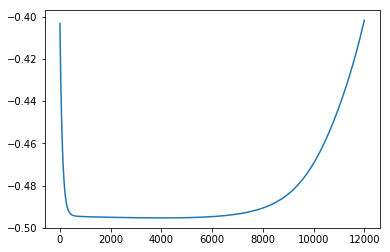

[1 0] [0.43045881643021583, 0.5313081648052714] [ 0.56954118 -0.53130816]


In [9]:
plt.plot(_epock,_error[0:12000,0])
plt.show()
i=2
net,v=for_prop(net,X[i])
net,e=back_prop(net,Y[i])
#n,v=for_prop(net,[0,0])
print(Y[i],v,e)

In [138]:
print(net)
def predict(net,x):
    for j in range (len(net)):
        Layer=net[j]
        Prev_Layer=net[j-1]
        if Layer['Layer']=='Input':
            Layer['val']=x
        else:
            val=np.dot(Layer['weight'],Prev_Layer['val'])
            val=sigmoid(val)
            Layer['val']=val
        if Layer['Layer']=='Output':
            return Layer['val']
print(predict(net,[0,1]))
print(Y)

[{'val': [1, 0], 'Layer': 'Input'}, {'delta': array([-0.00081763, -0.00081763, -0.00081763]), 'weight': array([[1.03363759, 0.94027708],
       [1.03363759, 0.94027708],
       [1.03363759, 0.94027708]]), 'val': array([0.73762051, 0.73762051, 0.73762051]), 'Layer': 'Hidden_one'}, {'delta': array([-0.1296502,  0.1296502]), 'weight': array([[ 0.02375382,  0.02375382,  0.02375382],
       [-0.02375382, -0.02375382, -0.02375382]]), 'val': array([0.51313795, 0.48686205]), 'Layer': 'Output'}]
[0.51280922 0.48719078]
[[0 1]
 [1 0]
 [1 0]
 [0 1]]


c:\python35\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


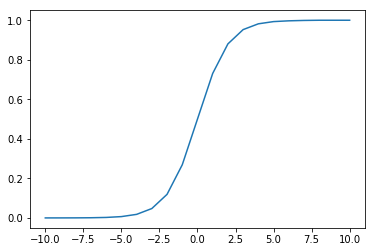

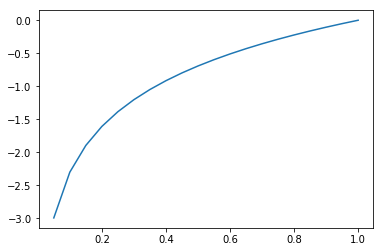

In [27]:
x=np.ones((21),np.int8)
for i in range(0,21):
    x[i]=i-10
y=np.exp(-1*x)
y=1+y
y=1/y
p=(x+10)/20
z=np.log(p)
print(x)
plt.plot(x,y)
plt.show()
plt.plot(p,z)
plt.show()

In [72]:
print(np.argmax([.2,.3]))

1
